<a href="https://colab.research.google.com/github/syma-afsha/Machine_Learning/blob/main/Syma_Afsha__Lab_5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Support Vector Machine (SVM)

## Goals of this lab
In this lab, you will:
- build a SVM classifier using scikit-learn
- visualize the decision boundary
- get an intuition on how the decision boundary maximises the margin
- analyse the impact of regularization parameter C in the decision boundary

## Introduction

A [**Support Vector Machine (SVM)**](https://uk.mathworks.com/discovery/support-vector-machine.html) is a supervised learning algorithm used for many classification and regression problems, including signal processing  medical applications, natural language processing, and speech and image recognition.

The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class. “Best” is defined as the hyperplane with the largest margin between the two classes. Only for linearly separable problems can the algorithm find such a hyperplane.



---



## Problem Statement

In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the "SVC" function (Support Vector Classifier).

First, we are going to import some libraries and functions that we will use:


*   `Numpy` library to work with arrays
*   `SVC` function from the SVM package in the Scikit-learn library, which is the one that implements SVM
*   `pyplot` package from Matplotlib, that will help us in plotting the results



In [ ]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [ ]:
# Create a meshgrid with values rangin from 0 to the maximum values of x and y
def make_meshgrid(x, y, h=.02):
    x_min, x_max = 0, x.max() + 1
    y_min, y_max = 0, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot the contours of a function clf within the values of xx and yy in the figure ax
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plot a figure with the points (X,Y) and the classification function
def plot_figure(X, Y, clf, dataset):
  fig, ax = plt.subplots(figsize=(10, 7))
  # title for the plots
  title = ('Decision surface of SVC '+dataset)
  # Set-up grid for plotting.
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='face')
  ax.set_ylabel('x2')
  ax.set_xlabel('x1')
  ax.set_xticks(np.arange(0, X0.max() + 1, 10))
  ax.set_yticks(np.arange(0, X1.max() + 1, 10))
  ax.set_title(title)
  plt.show()



---



## Training and Validation datasets

Support vectors refer to a subset of the training observations that define what should be the location of the separating hyperplane to classify positive and negative examples. Because we will be working with 2D data (we only use two features $x_1$ and $x_2$, our hyperplane is just a line in our case.

The standard SVM algorithm is formulated for binary classification problems, although modern libraries have built-in multi-class classification functionality. Otherwise, we should use one-vs.-all method.

In our lab, we have a simple 2-dimensional dataset with two classes of observations. As usual, we have a training and a validation dataset:

*   Training data, where **XTrain** contains the feature values of the training examples and **yTrain** contains the ground truth of these examples. This dataset will be used to train the SVM models.
*   Validation data, where **XVal** contains the feature values of the validation samples and **yVal** contains the ground truth of these samples. This dataset will be used to verify how accurate the trained SVM models really are.



In [ ]:
# Parameters of training data
XTrain = np.array([[ 4, 43], [ 5, 12], [10, 31], [10, 20], [20, 37], [16, 10], [22, 18], [24,  4], [28,  9], [33, 19], [38,  5], [15, 47], [30, 32], [52,  6], [ 6, 60], \
                   [50,  8], [23, 58], [26, 50], [30, 40], [35, 28], [42, 61], [36, 50], [43, 37], [46, 45], [50, 22], [55, 35], [65, 25], [70, 46], [27, 37], [24, 23], [38, 19]])
# Ground truth of training data
yTrain = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Parameters of validation data
XVal = np.array([[3, 56], [4, 18], [6, 5], [10, 32], [16, 19], [18, 3], [33, 6], [28, 15], [28, 25], [24, 30], [25, 57], [50, 3], \
                  [20, 53], [28, 55], [35, 45], [38, 27], [37, 13], [40, 3], [57, 5], [53, 29], [50, 46], [64, 34], [65, 57], [31, 30]])
# Ground truth of validation data
yVal = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])



---



## Creating a SVM Classifier

**Support Vector Machines or Classifiers** fall under a class of machine learning algorithms called kernel methods where the features can be transformed using a kernel function. Kernel functions map the data to a different, often higher dimensional space with the expectation that the classes will be easier to separate after this transformation, potentially simplifying a complex non-linear decision boundaries to linear ones in the higher dimensional, mapped feature space.

To start, we have an example of how to create a basic **Support Vector Classifier with a 'linear' kernel**, that is, a linear function that defines the margin between two classes of objects in the space, and the percentage of correct predictions this model predicts with the training data. This SVM or SVC is created with the "SVC" function provided by the Scikit-Learn library.

In [ ]:
# Create linear model
modelLinear = SVC(kernel='linear')
# Train the model using the data
clfLinear = modelLinear.fit(XTrain, yTrain)

# Check predictions for training data
res = modelLinear.predict(XTrain)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round((100/len(res)*(res==yTrain).sum()), 2))

% of correct predictions with training data
90.32


Sometimes a polynomial kernel, or function, works better for some distributions. The SVC function used allows us to define diferent kinds of functions, such as 'linear', as the previous example, or 'poly'.

Define a new SVM model with a polynomial function of degrees 3 and 10, and compare the results with the linear ones. **Which one is better?**

<font color='red'>A polynomial function of 10 degree is better than linear and
linear is better than 3 degree polynomial. Because the percentage of correct predictions with training data  for 10 degree is 96.77%, the percentage of correct predictions with training data for linear is 90.32% and the percentage of correct predictions with training data for 3 degree polynomial is 87.1%.

 10 degree polynomial > linear > 3 degree polynomial.  
 </font>

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10 and calculate % of correct predictions for the training data
# polynomial function of degrees 3
modelPoly3 =SVC(kernel='poly',degree=3) #__________TO DO__________
clfPoly3 =modelPoly3.fit(XTrain,yTrain)#__________TO DO__________
# Check predictions for training data
res = modelPoly3.predict(XTrain)#__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round((100/len(res)*(res==yTrain).sum()),2)) # TO DO: Round the results to 2 decimals

# polynomial function of degrees 10
modelPoly10 =SVC(kernel='poly',degree=10)  #__________TO DO__________
clfPoly10 = modelPoly10.fit(XTrain,yTrain)#__________TO DO__________
# Check predictions for training data
res =  modelPoly10.predict(XTrain)#__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round((100/len(res)*(res==yTrain).sum()),2)) # TO DO: Round the results to 2 decimals

% of correct predictions with training data
87.1
% of correct predictions with training data
96.77


Now we have some models created and we know the % of correct predictions of the training data.

**Which is the % of correct predictions for the validation data? Having these results in mind, which would be the best model for these distribution? Is it the same one as before? In case it isn't, why not?**



<font color='red'>% of correct predictions with training data for linear
83.33, % of correct predictions with validation data for 3 degree polynomial 75.0  and % of correct predictions with validation data for 10 degree polynomial 75.0.
I think the best model for these distribution would be Linear beacause of higher percentage of correct predictions with training data.

<font color='red'>It isn't same as before. </font>

<font color='red'> Linear > 3 degree polynomial > 10 degree polynomial. </font>

Linear kernel achieves higher accuracy than both degrees polynomials.The same validation results come from 3 degree and 10 degree polynomials because  10-degree polynomial kernel is  fits the training data extremely well but doesn't generalize well to unseen data, which means it can lead to overfitting. In contrast, a 3-degree polynomial kernel is less prone to overfitting, so it achieves similar validation accuracy because it generalizes better means it doesn't overfit as severely as the 10-degree polynomial kernel.
</font>

In [ ]:
# TO DO: Calculate % of correct predictions for the validation data
#__________TO DO__________
res = modelLinear.predict(XVal)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data for linear")
print(round((100/len(res)*(res==yVal).sum()), 2))
res_val = modelPoly3.predict(XVal)
print("% of correct predictions with validation data for 3 degree polynomial")
print(100/len(res_val)*(res_val==yVal).sum())

res_val1 = modelPoly10.predict(XVal)
print("% of correct predictions with validation data for 10 degree polynomial")
print(100/len(res_val1)*(res_val1==yVal).sum())


% of correct predictions with training data for linear
83.33
% of correct predictions with validation data for 3 degree polynomial
75.0
% of correct predictions with validation data for 10 degree polynomial
75.0




---



## Plotting the results

Most times analizing these results can be complicated. In this case, as we have 2D data, we can plot the results to further analize them, but bear in mind that, in most cases, we usually have more than 3 dimensions, preventing us from being able to plot this models.

Here, we are plotting the different models we created *(linear and polynomials of degrees 3 and 10)* with the training and validation data.

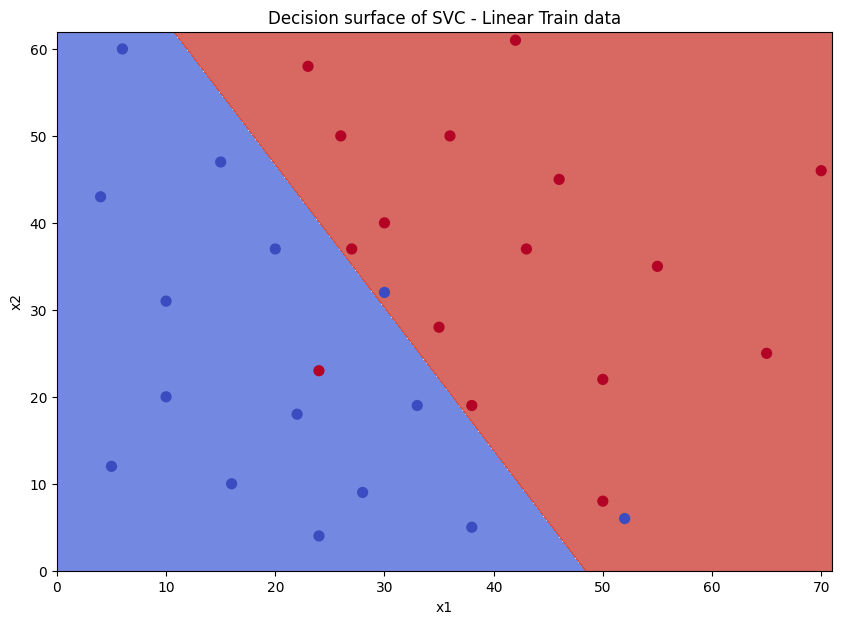

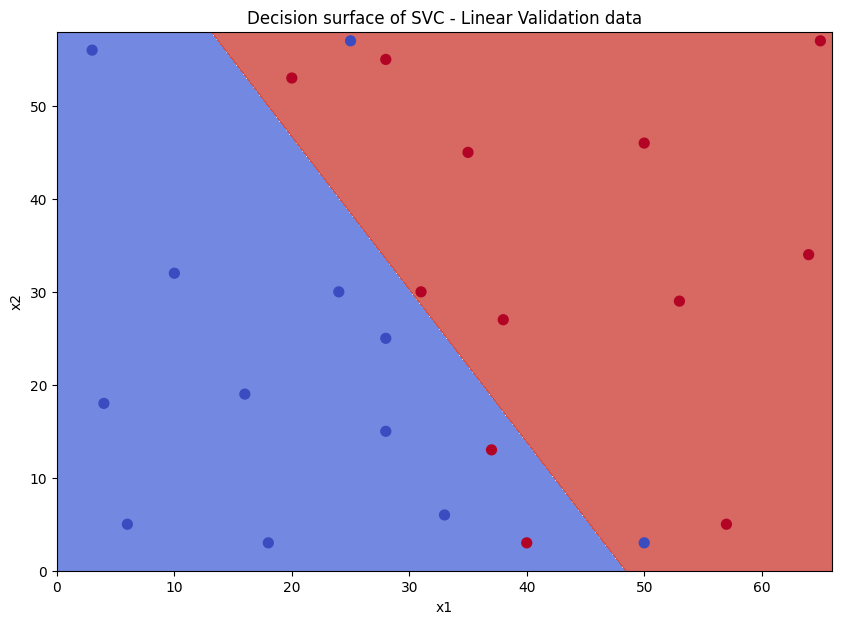

In [ ]:
# Plot the resulting linear model with the training and validation datasets
plot_figure(XTrain, yTrain, clfLinear, '- Linear Train data')
plot_figure(XVal, yVal, clfLinear, '- Linear Validation data')

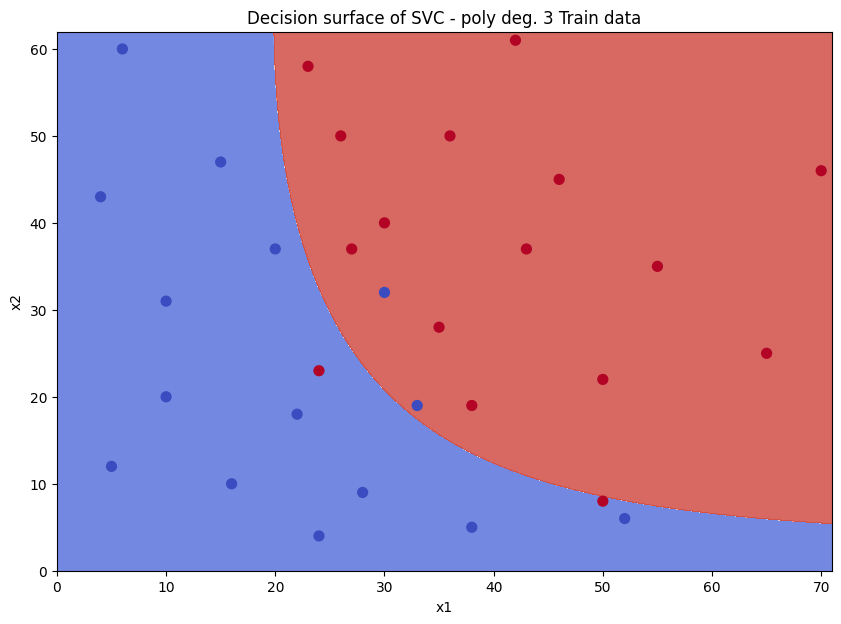

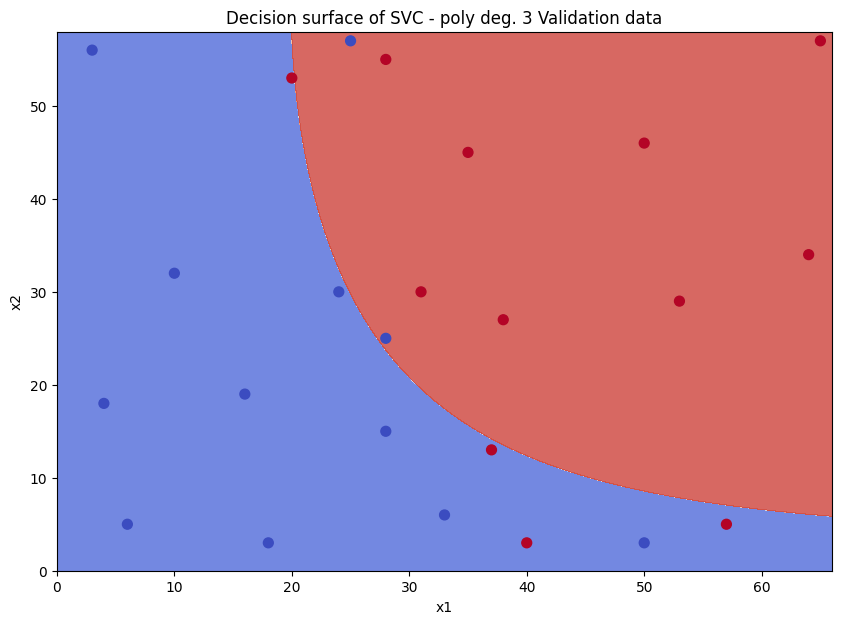

In [ ]:
#Plot the resulting polynomial model of degree 3 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly3, '- poly deg. 3 Train data')
plot_figure(XVal, yVal, clfPoly3, '- poly deg. 3 Validation data')

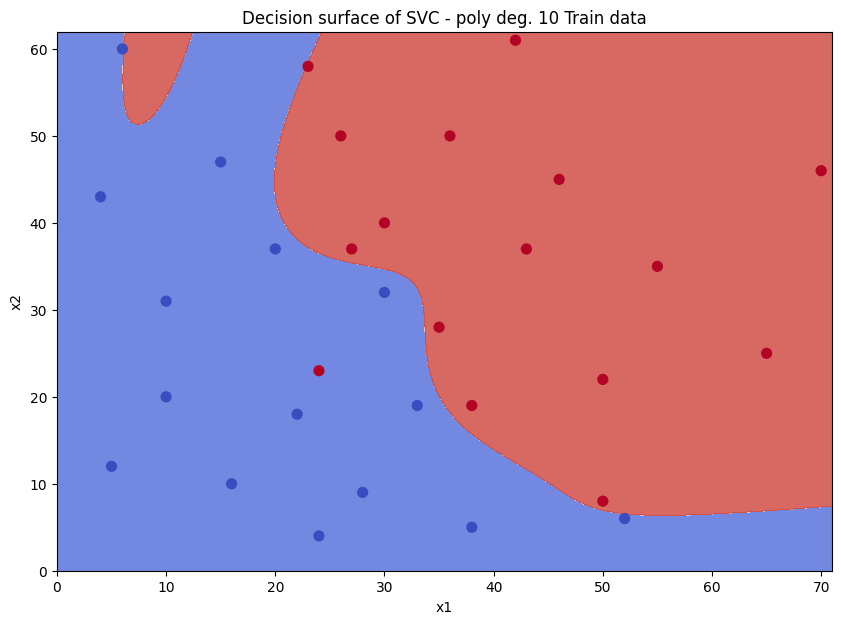

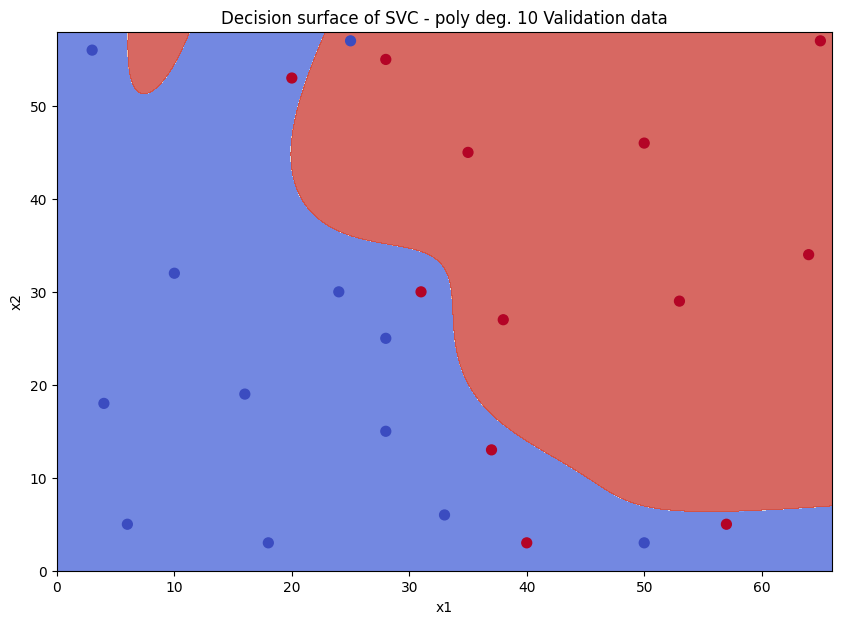

In [ ]:
# #Plot the resulting polynomial model of degree 10 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly10, '- poly deg. 10 Train data')
plot_figure(XVal, yVal, clfPoly10, '- poly deg. 10 Validation data')



---



## Regularization parameter C

The SVC function allows us to define the value of the regularization parameter C. Check how to define it, try diferent values $(10^{-5},10^{-2},1,10,10^3...)$ of C on the polynomial functions defined previously and compare the results.

**What is the effect of this parameter on the function?**

<font color='red'> The regularization parameter, C in  SVM allows to control the trade-off between maximizing the margin and minimizing misclassifications.

<font color='red'> The effect of this parameter on the function:

<font color='red'> When C is too small, the model might underfit the training data, meaning it doesn't capture the underlying patterns effectively.For examaple: 10^-5 regularization parameter.

<font color='red'> When C is small, the SVM places more emphasis on maximizing the margin, even if it means some training data points might be misclassified.This means Small C values tend to result in high bias and low variance.  For examaple: 10^-2 and 1 regularization parameters.

<font color='red'> When C is large, the SVM is more focused on minimizing misclassifications. This means a smaller margin will be accepted if the decision function is better at classifying all training points correctly. Large C values tend to result in low bias and high variance, meaning the model pays strong attention to fitting the training data but might overfit, leading to poor generalization. For example: 10 regularization parameter.

<font color='red'> When C is too large, the model may overfit the training data, fitting noise and having poor generalization performance on unseen data. For example: 10³ regularization parameter.

 </font>

% of correct predictions with training data (C=1e-05, degree=3): 51.61290322580645%
% of correct predictions with validation data (C=1e-05, degree=3): 50.0%


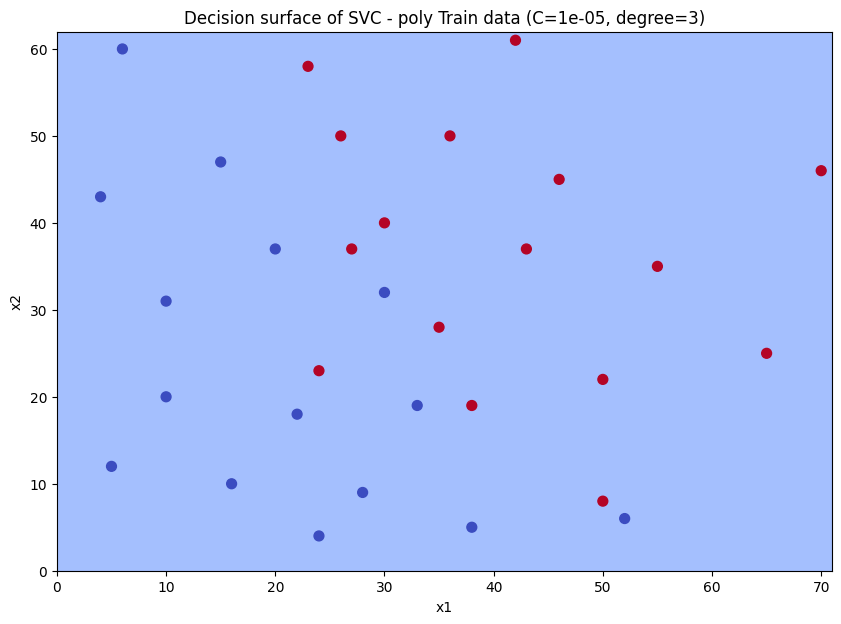

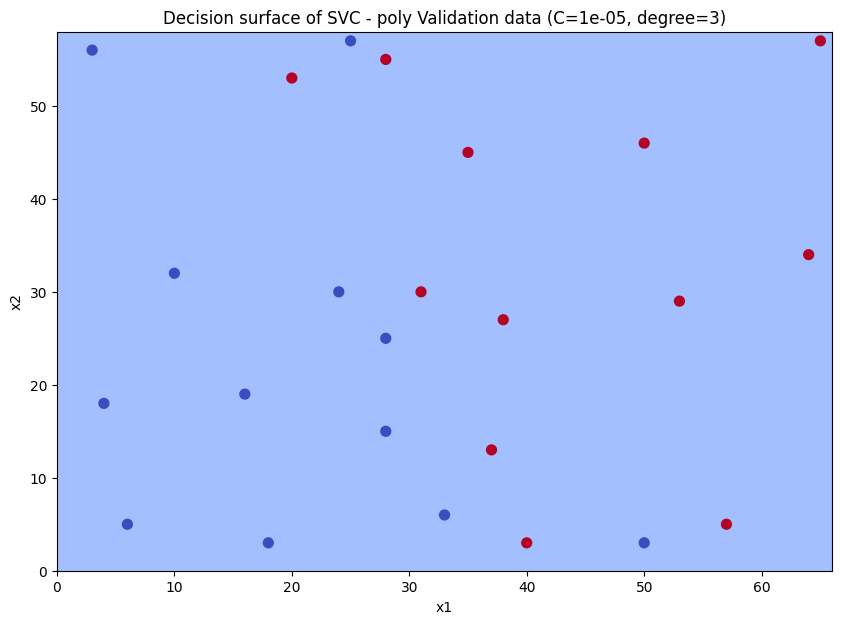

% of correct predictions with training data (C=0.01, degree=3): 87.09677419354838%
% of correct predictions with validation data (C=0.01, degree=3): 83.33333333333334%


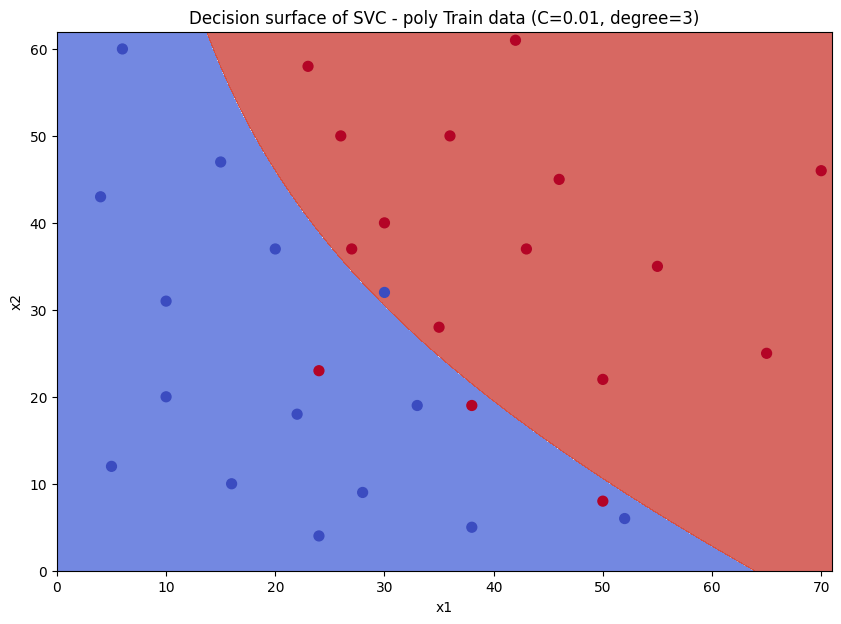

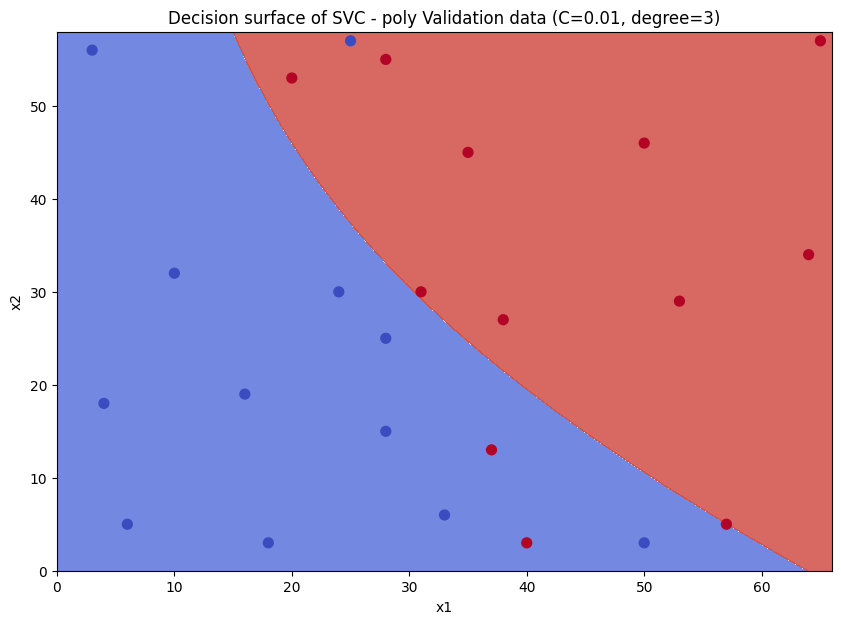

% of correct predictions with training data (C=1, degree=3): 87.09677419354838%
% of correct predictions with validation data (C=1, degree=3): 75.0%


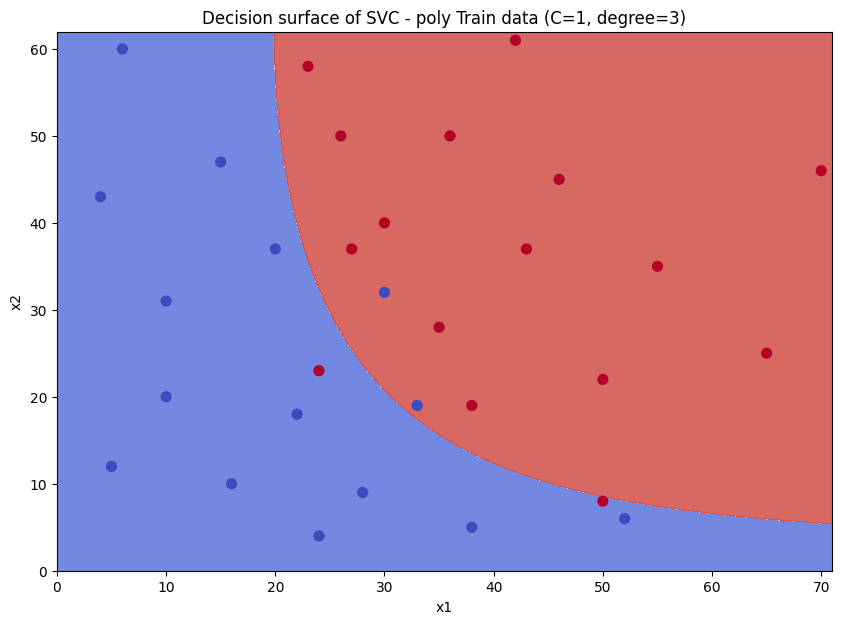

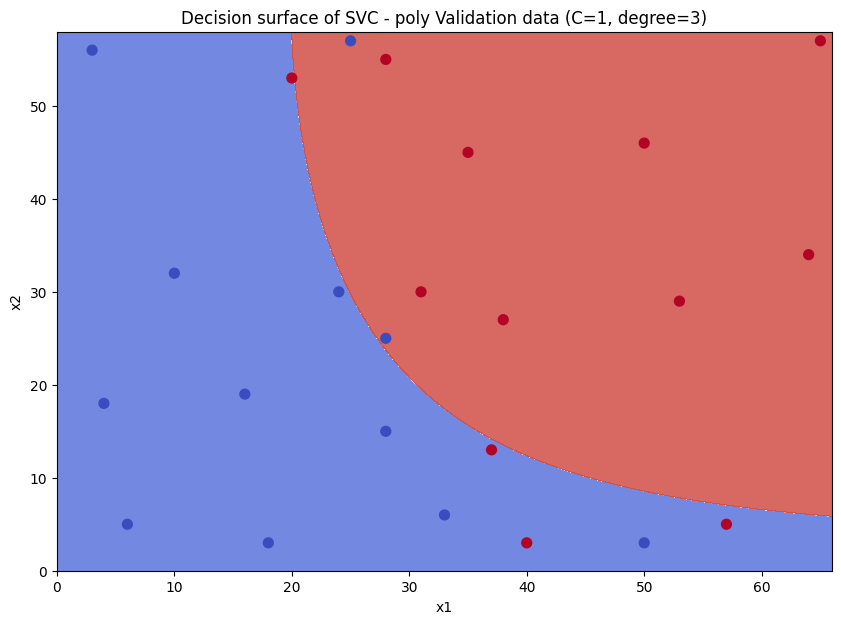

% of correct predictions with training data (C=10, degree=3): 87.09677419354838%
% of correct predictions with validation data (C=10, degree=3): 79.16666666666667%


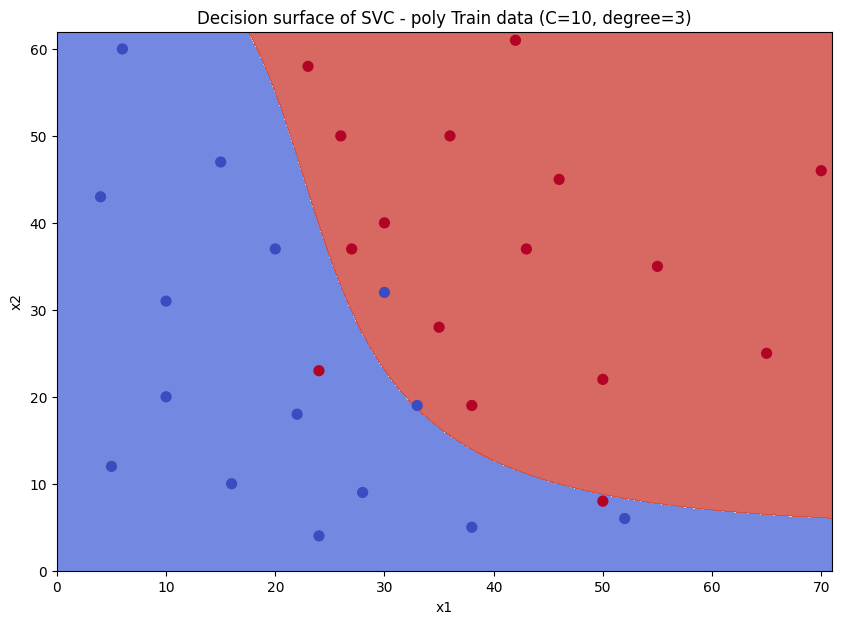

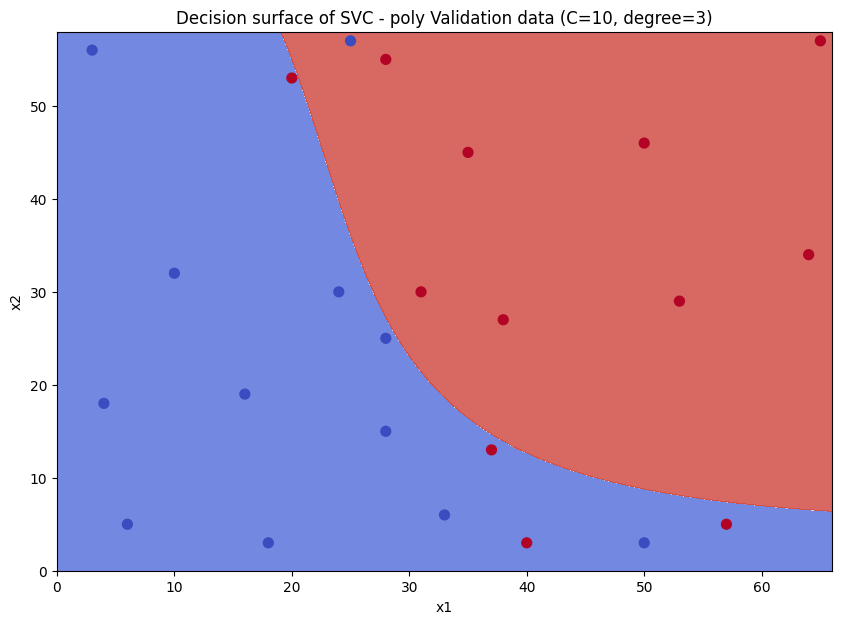

% of correct predictions with training data (C=1000.0, degree=3): 87.09677419354838%
% of correct predictions with validation data (C=1000.0, degree=3): 79.16666666666667%


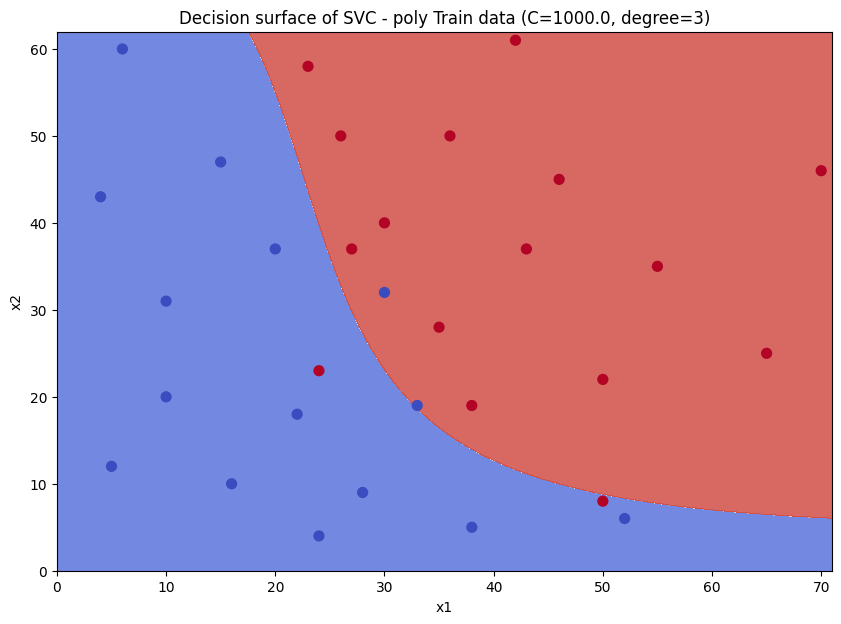

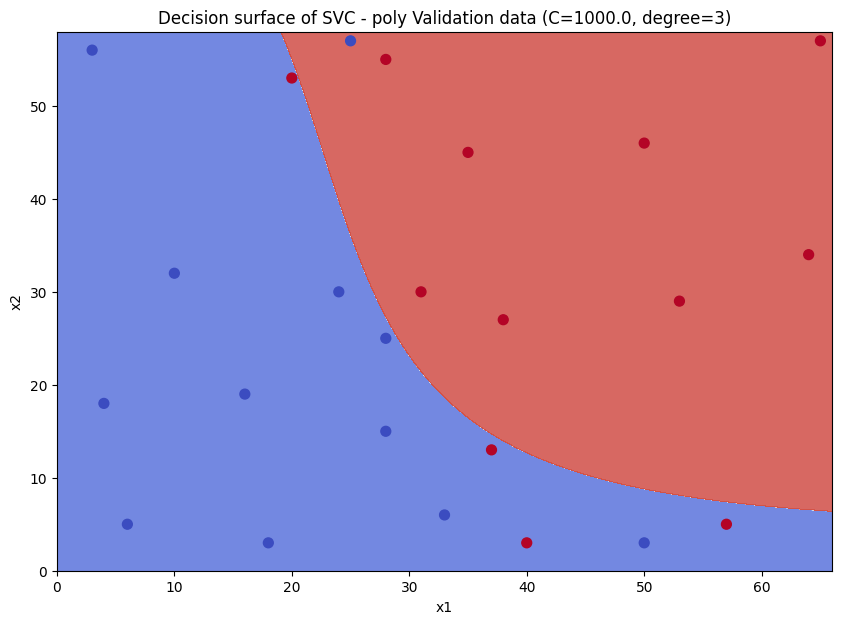

% of correct predictions with training data (C=1e-05, degree=10): 93.54838709677419%
% of correct predictions with validation data (C=1e-05, degree=10): 83.33333333333334%


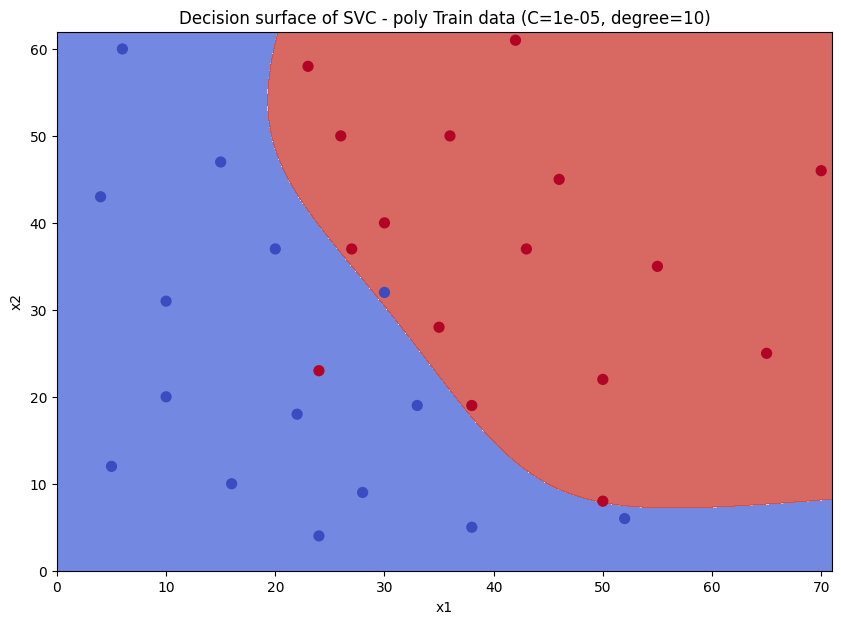

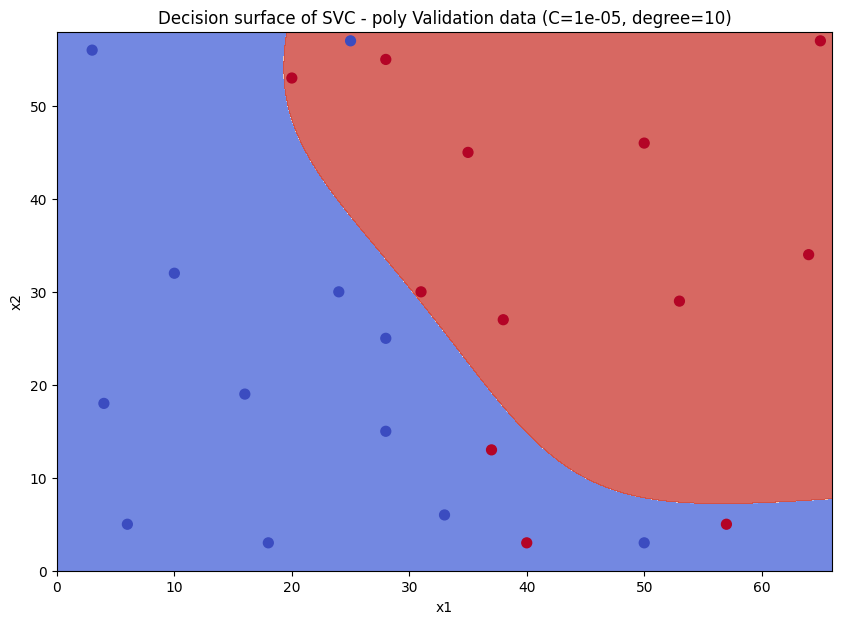

% of correct predictions with training data (C=0.01, degree=10): 96.77419354838709%
% of correct predictions with validation data (C=0.01, degree=10): 75.0%


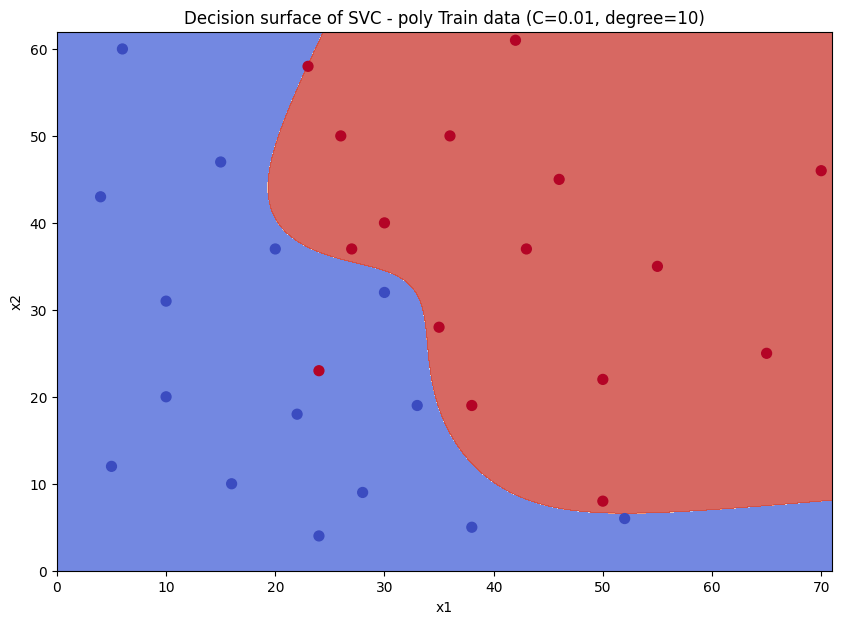

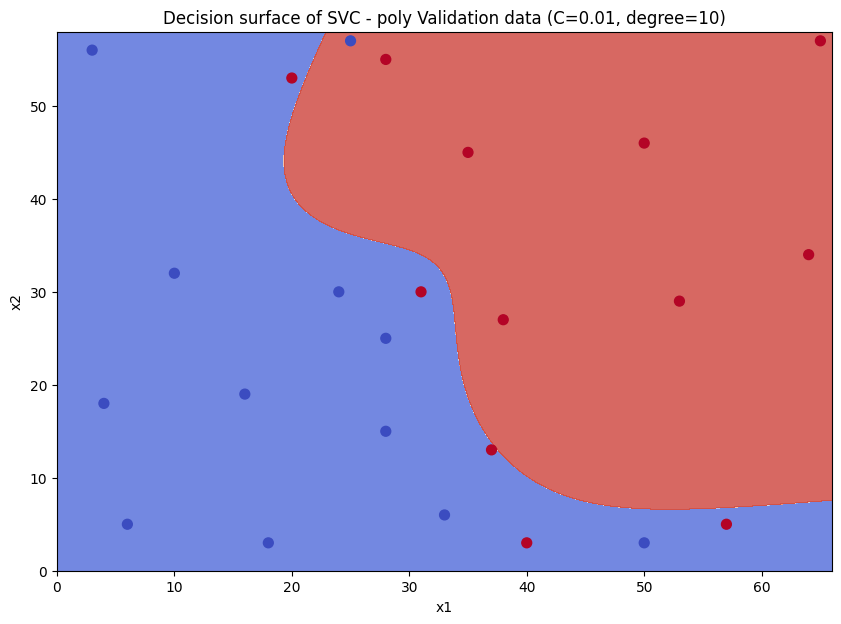

% of correct predictions with training data (C=1, degree=10): 96.77419354838709%
% of correct predictions with validation data (C=1, degree=10): 75.0%


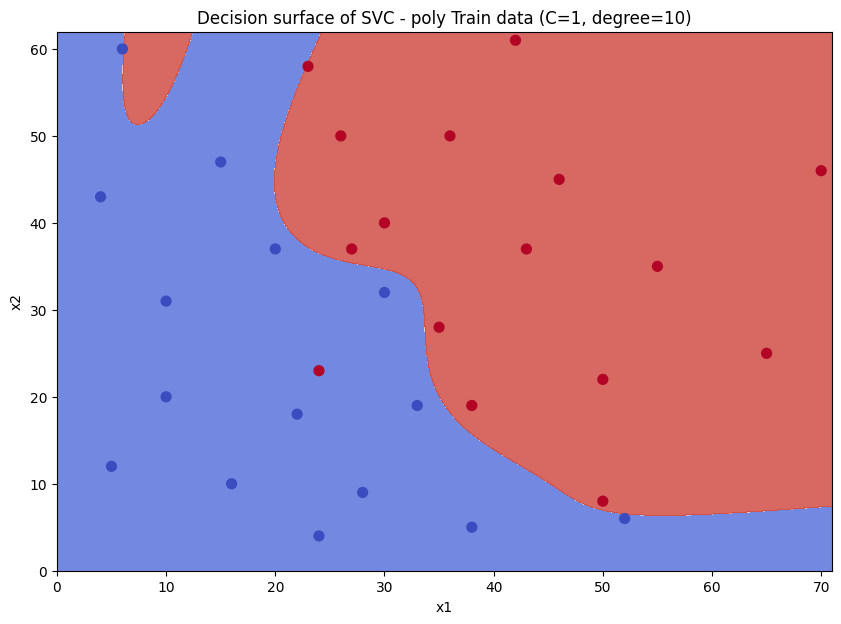

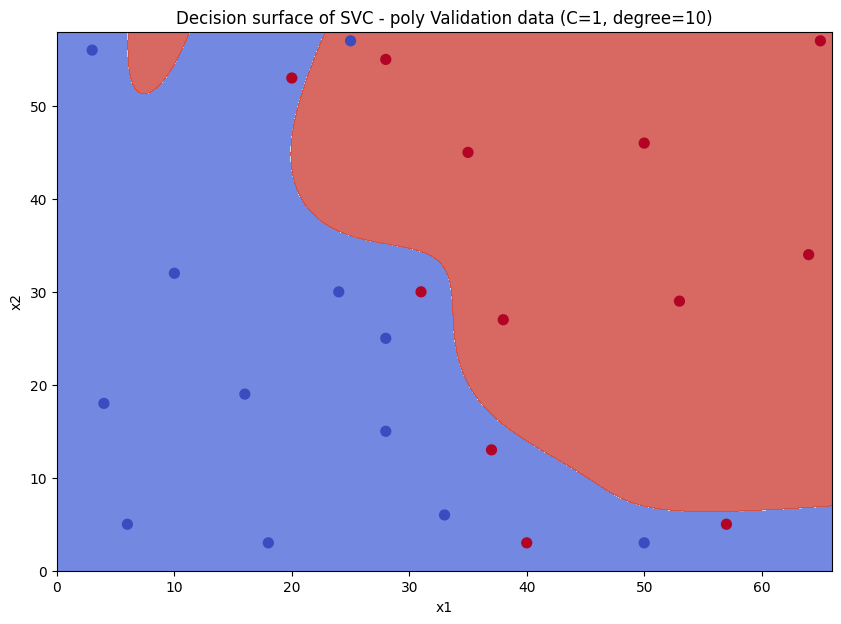

% of correct predictions with training data (C=10, degree=10): 96.77419354838709%
% of correct predictions with validation data (C=10, degree=10): 75.0%


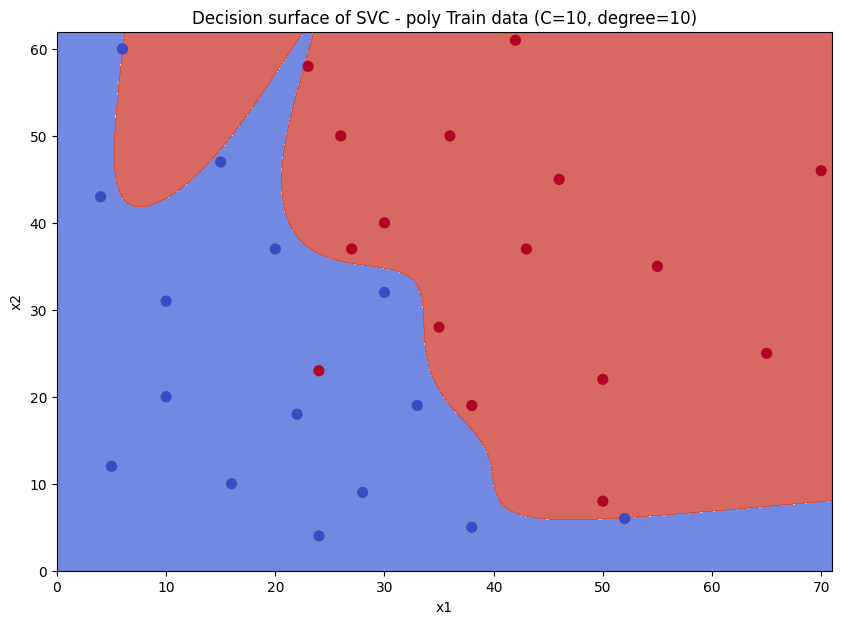

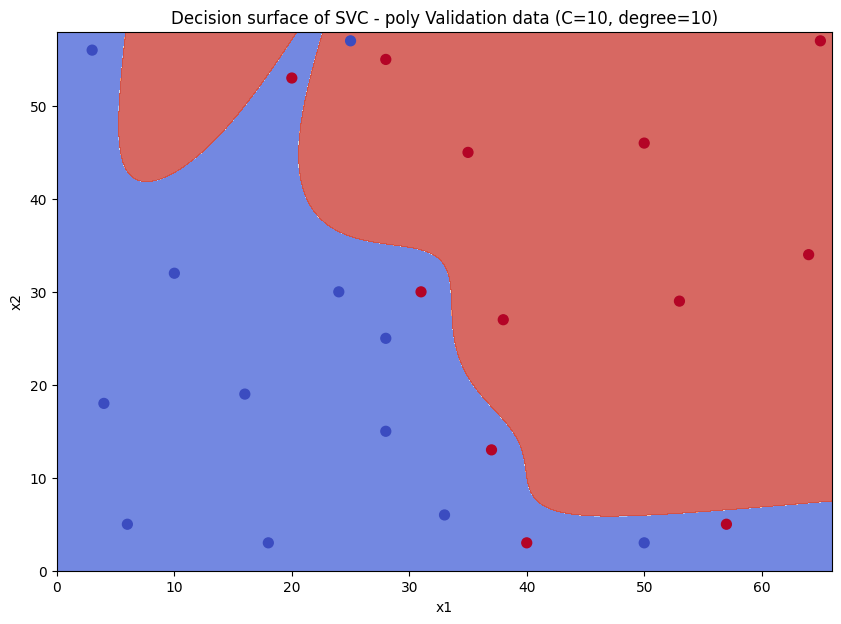

% of correct predictions with training data (C=1000.0, degree=10): 87.09677419354838%
% of correct predictions with validation data (C=1000.0, degree=10): 79.16666666666667%


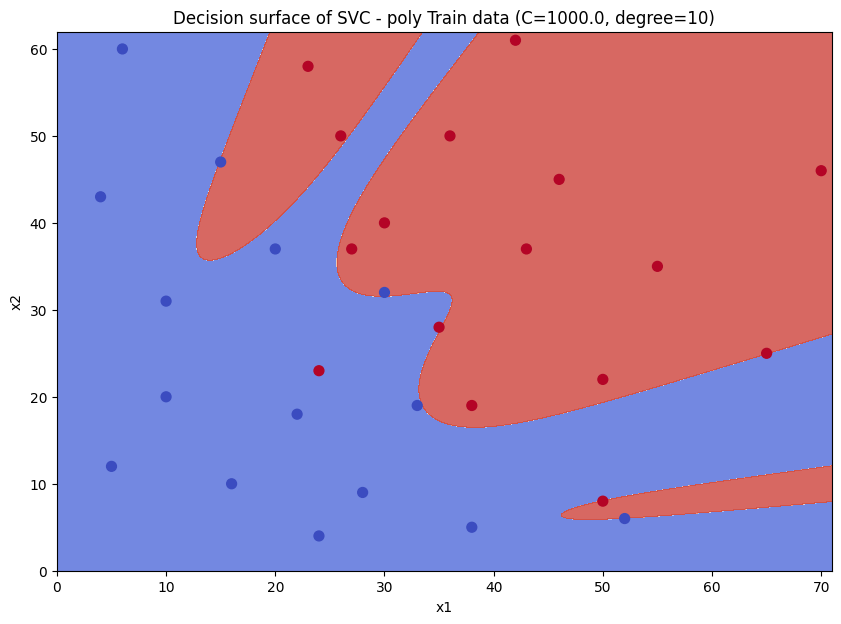

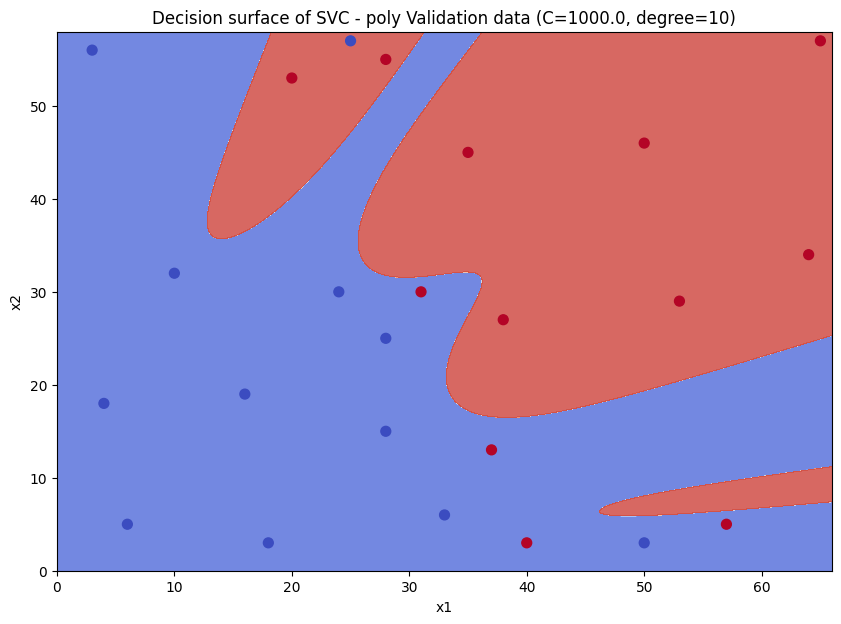

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10, define the C value and calculate % of correct predictions for the training and validation data
# polynomial function
Regularization_parameter=[1e-5, 1e-2, 1, 10, 1e3]
degree=[3,10]
for d in degree:
  for c in Regularization_parameter:
    modelPoly =SVC(kernel='poly', degree=d,C=c) #__________TO DO__________
    clfPoly =modelPoly.fit(XTrain,yTrain)#__________TO DO__________
  # Check predictions for training data
    res = modelPoly.predict(XTrain)#__________TO DO__________
  # Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)

    correct_predictions_training=100/len(res)*(res==yTrain).sum()
    print(f"% of correct predictions with training data (C={c}, degree={d}): {correct_predictions_training}%")
    res_val1 = modelPoly.predict(XVal)
    correct_predictions_validation= 100/len(res_val1)*(res_val1==yVal).sum()
    print(f"% of correct predictions with validation data (C={c}, degree={d}): {correct_predictions_validation}%")


#__________TO DO________
    plot_figure(XTrain, yTrain, clfPoly, f'- poly Train data (C={c}, degree={d})')

# TO DO: Check predictions for validation data
#__________TO DO________
    plot_figure(XVal, yVal, clfPoly, f'- poly Validation data (C={c}, degree={d})')

## The gamma $(\gamma)$ parameter

Another parameter that can be modified is the $\gamma$ parameter. Define a new model with a 'rbf' kernel and try different values of C and $\gamma$ together. **What does 'rbf' stand for?** **How does it work?** **What is the effect of the gamma parameter $(\gamma)$ over the function?**

<font color='red'> The term 'rbf' stands for "Radial Basis Function," which is also commonly referred to as the Gaussian kernel.

<font color='red'> The RBF kernel measures the similarity between two data points as a function of the Euclidean distance between them. The gamma parameter (γ) controls the width of the Gaussian kernel's bell curve, affecting the trade-off between bias and variance. Choosing the right value of gamma is crucial for achieving good performance with the RBF kernel.


<font color='red'> The kernel function is defined as:


<font color='red'> K(x, y) = exp(-gamma ||x – y||^2)

<font color='red'>[gamma, 𝛾= 1/2(δ)²]


<font color='red'> where x and y are two data points, gamma is a parameter that determines the width of the kernel function, and ||x – y|| is the Euclidean distance between x and y.

<font color='red'> The effect of this parameter on the function:

<font color='red'> When γ is very small, the model is overly limited and cannot describe the complexity or "shape" of the data. Any selected support vector's area of effect would include the whole training set. The final model will act as a linear model with a collection of hyperplanes separating the centers of high density of any two classes.

<font color='red'> When γ is small, the Gaussian kernel has a wide bell curve. This means that data points from a broader region are considered similar, and the decision boundary tends to be smoother. C affects the model just like how it affects a linear model.

<font color='red'> When γ is large, the Gaussian kernel has a narrow bell curve. This means that data points must be very close to each other to be considered similar. The decision boundary becomes more complex, and the model may fit the training data very closely. The effect of C becomes negligible.

 </font>







% of correct predictions with training data (C=1e-05, gamma=1e-05): 51.61290322580645%
% of correct predictions with validation data (C=1e-05, gamma=1e-05): 50.0%


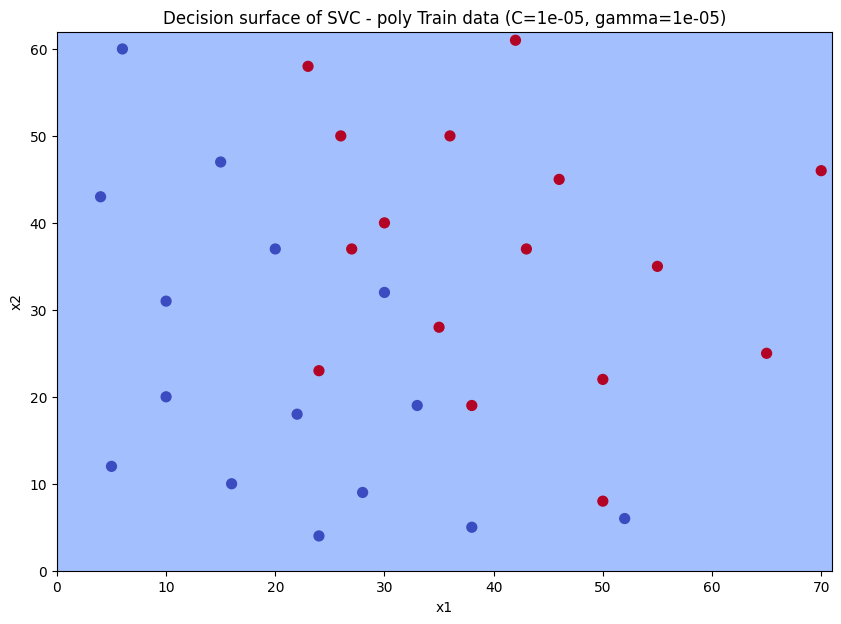

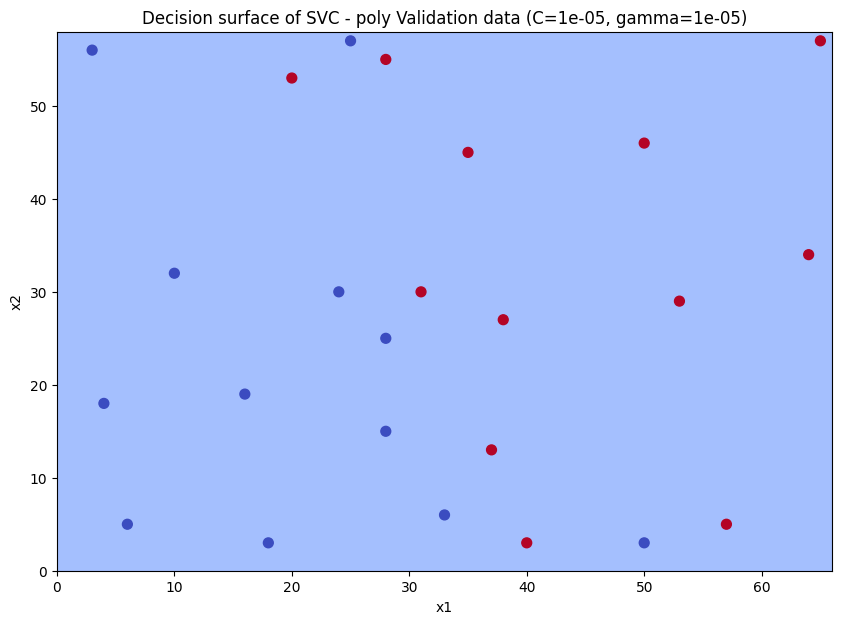

% of correct predictions with training data (C=1e-05, gamma=0.01): 51.61290322580645%
% of correct predictions with validation data (C=1e-05, gamma=0.01): 50.0%


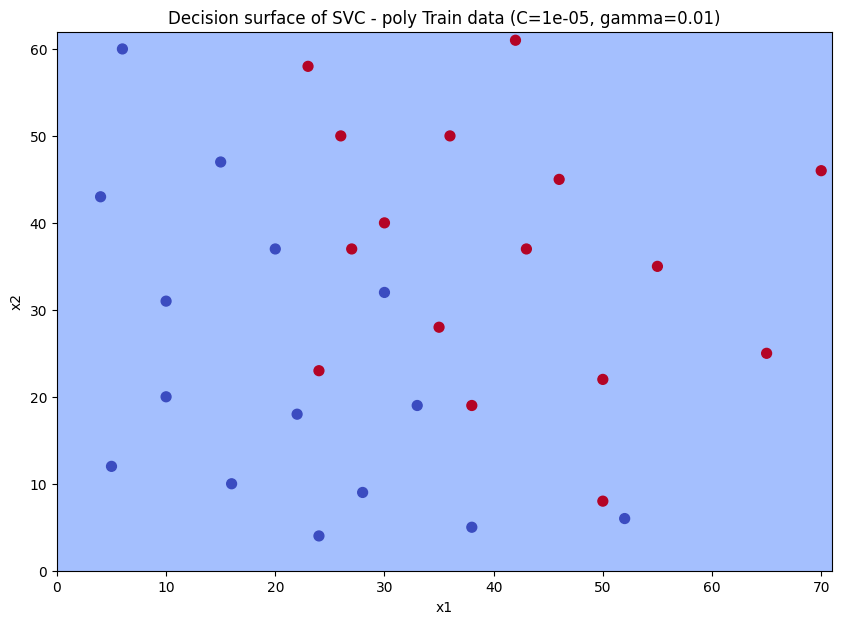

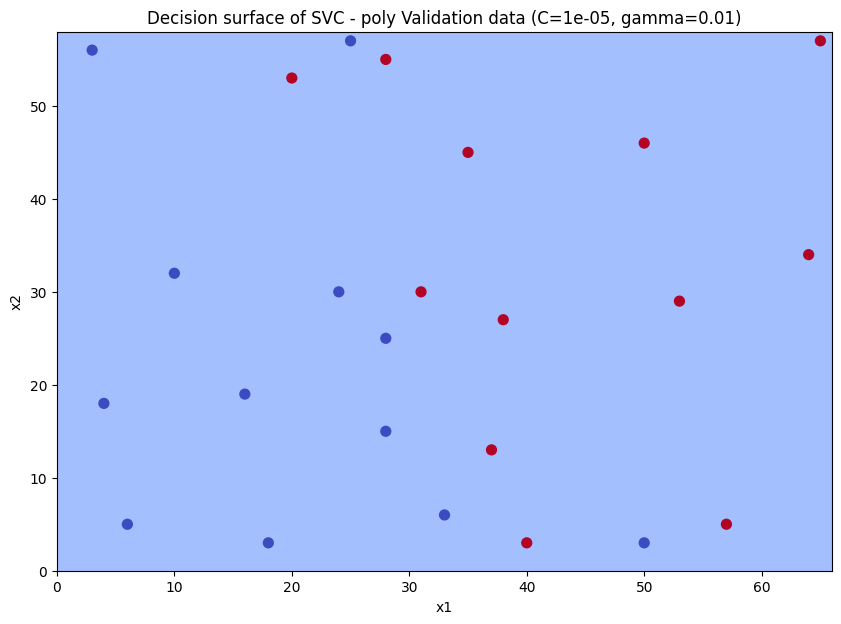

% of correct predictions with training data (C=1e-05, gamma=0.1): 51.61290322580645%
% of correct predictions with validation data (C=1e-05, gamma=0.1): 50.0%


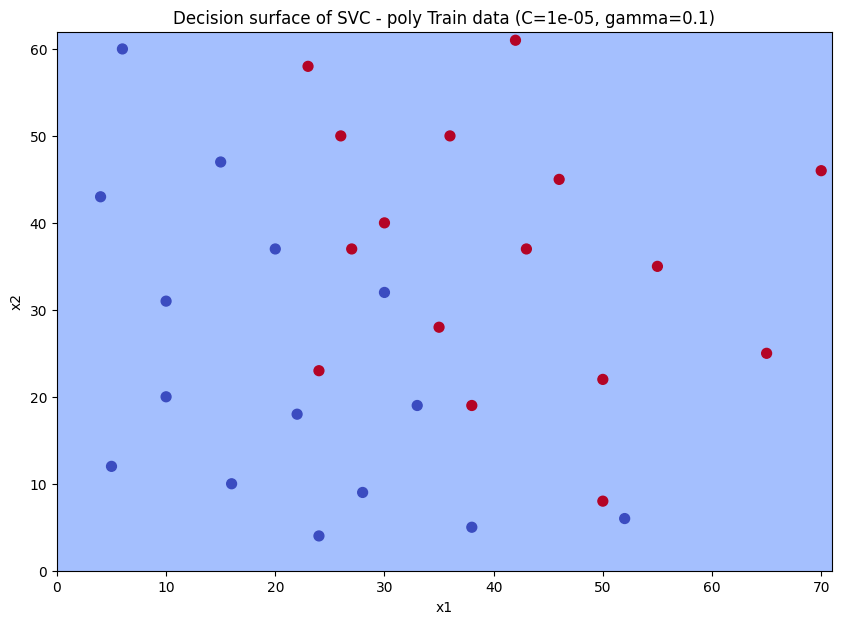

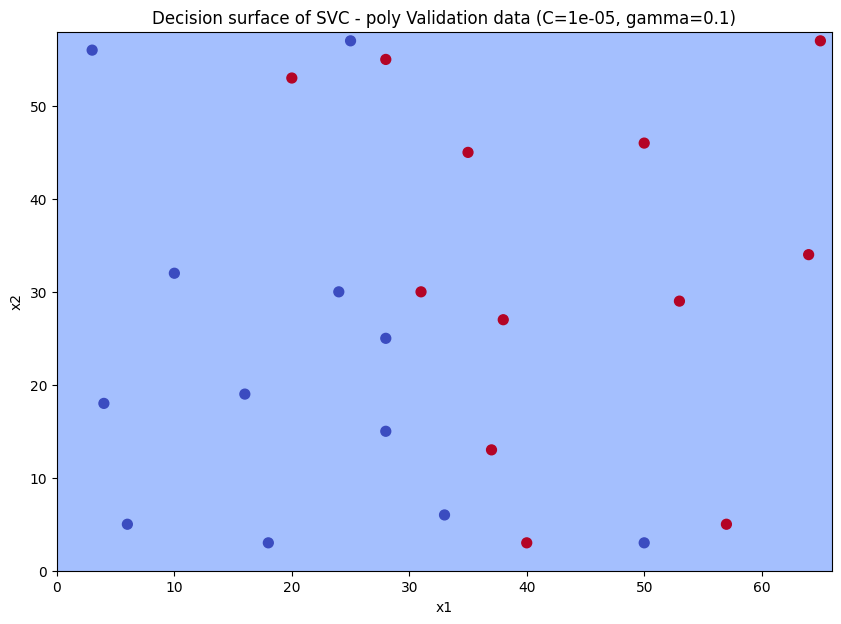

% of correct predictions with training data (C=1e-05, gamma=0.5): 51.61290322580645%
% of correct predictions with validation data (C=1e-05, gamma=0.5): 50.0%


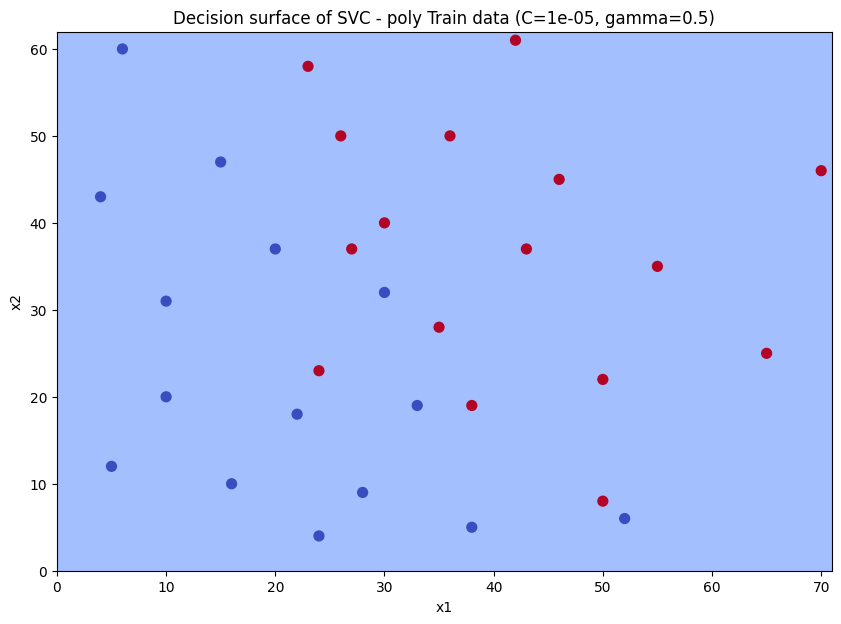

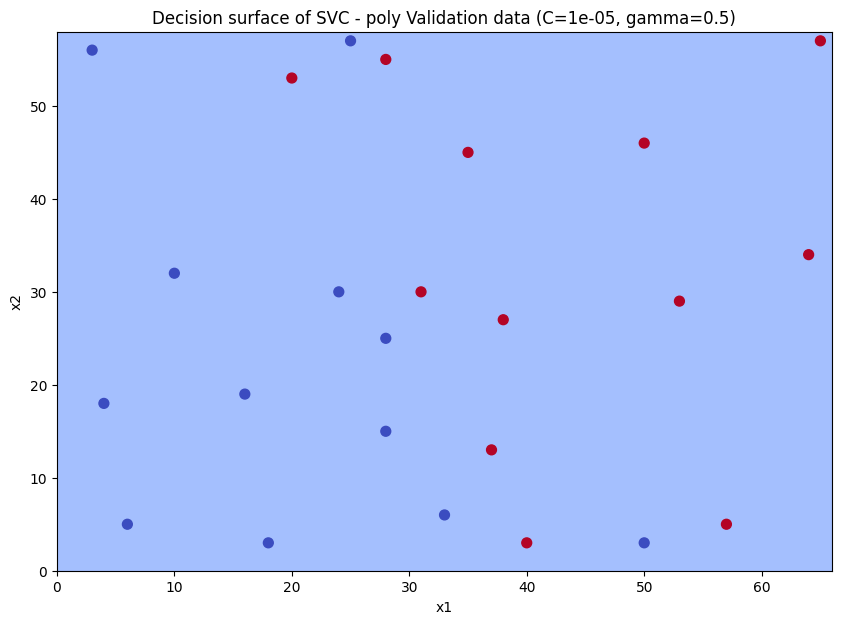

% of correct predictions with training data (C=1e-05, gamma=1): 51.61290322580645%
% of correct predictions with validation data (C=1e-05, gamma=1): 50.0%


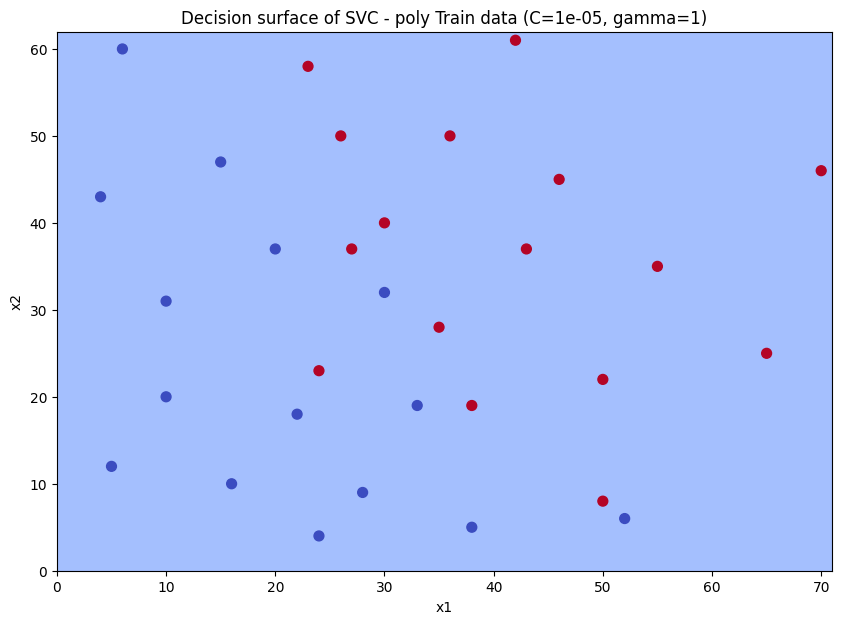

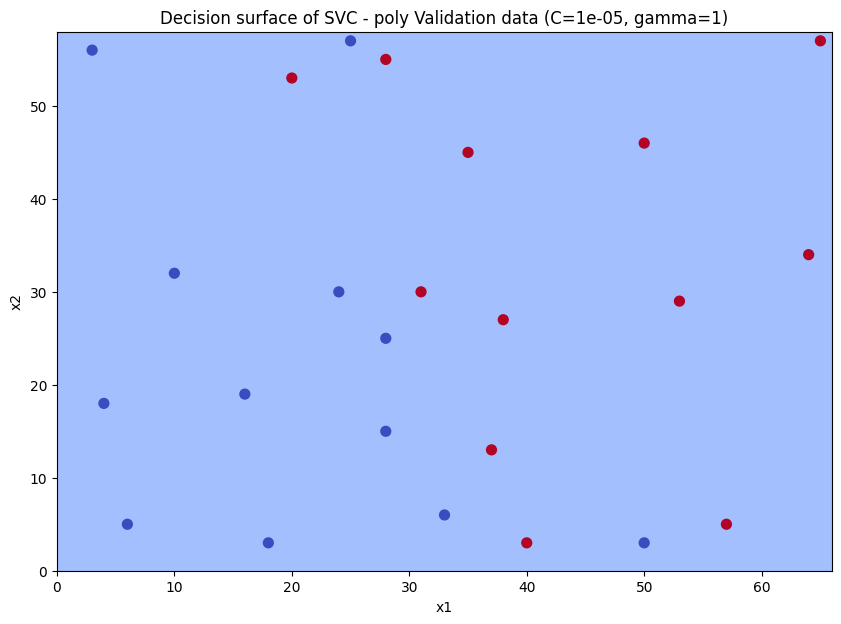

% of correct predictions with training data (C=1e-05, gamma=10): 51.61290322580645%
% of correct predictions with validation data (C=1e-05, gamma=10): 50.0%


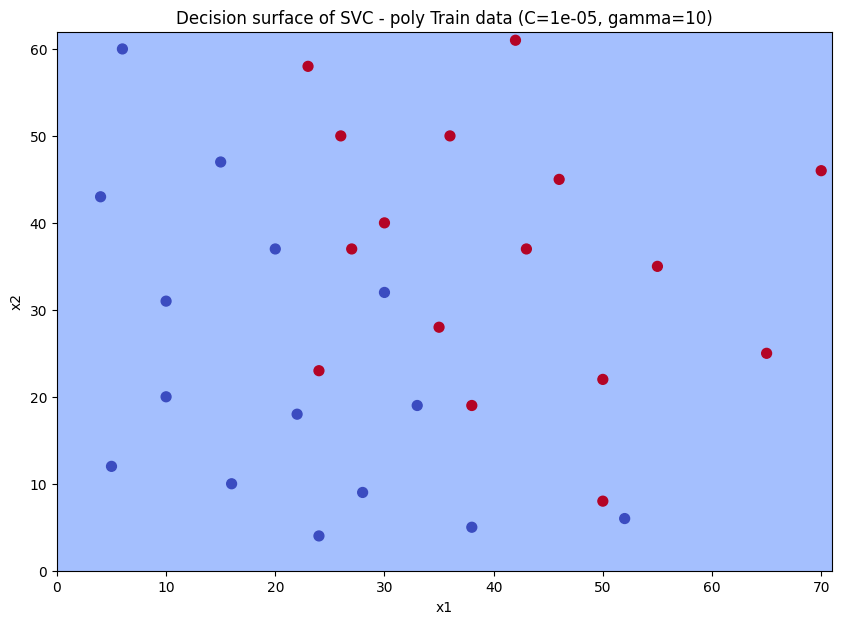

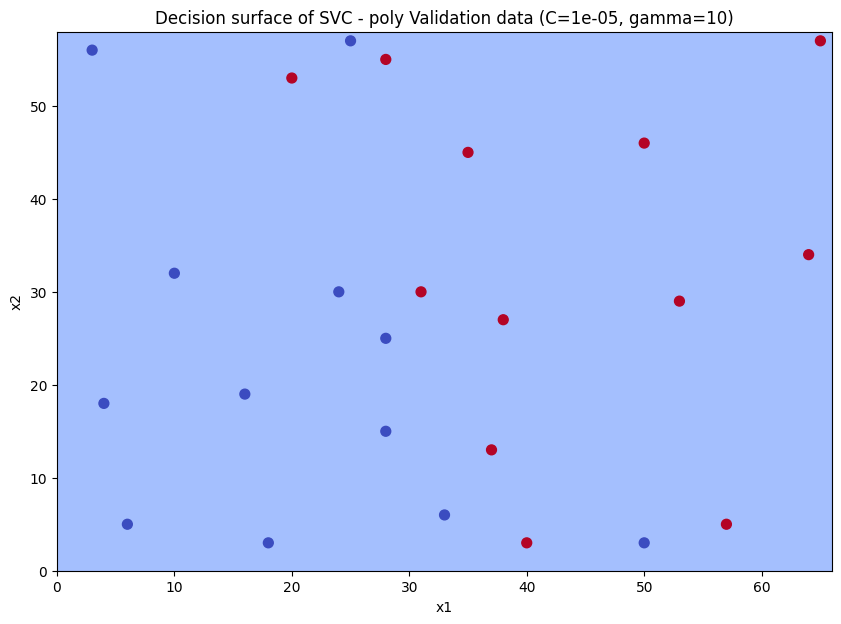

% of correct predictions with training data (C=0.01, gamma=1e-05): 51.61290322580645%
% of correct predictions with validation data (C=0.01, gamma=1e-05): 50.0%


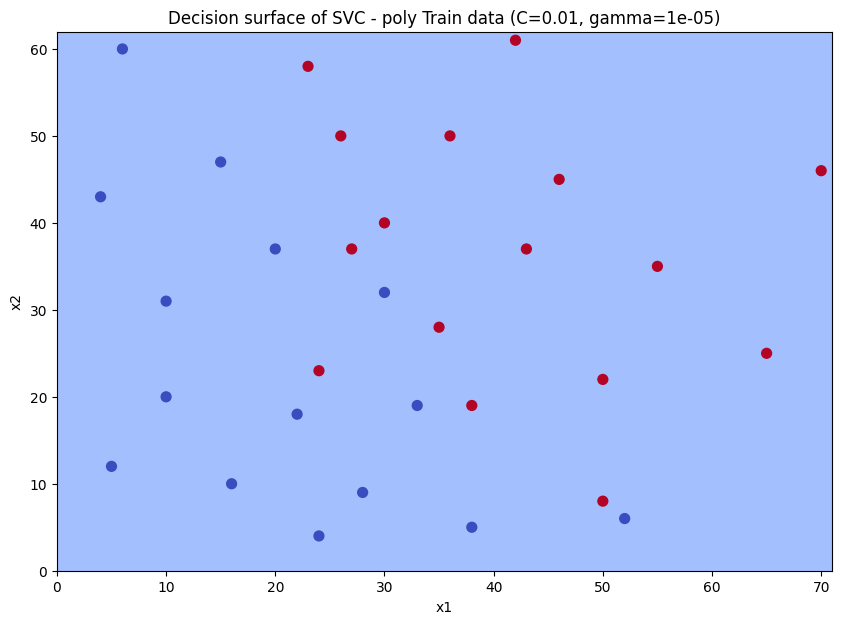

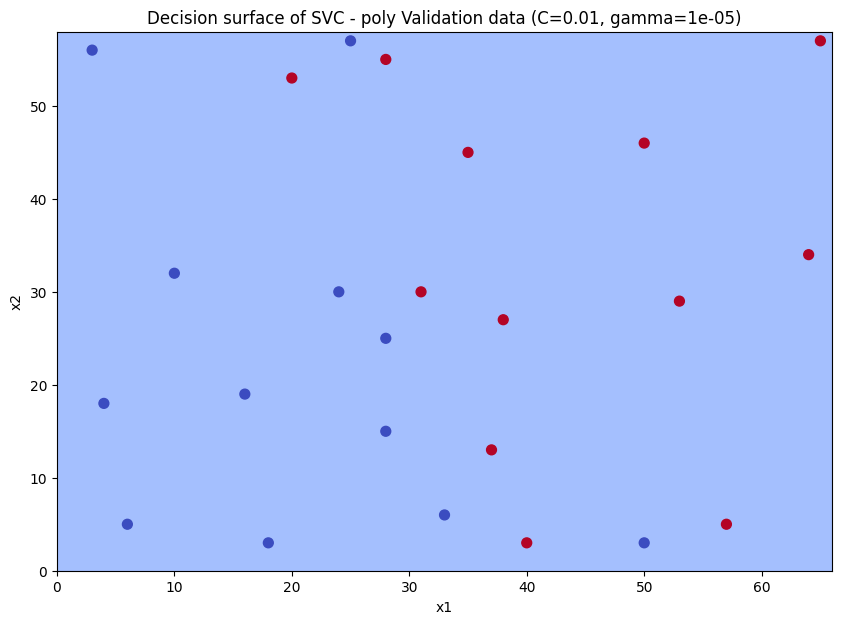

% of correct predictions with training data (C=0.01, gamma=0.01): 51.61290322580645%
% of correct predictions with validation data (C=0.01, gamma=0.01): 50.0%


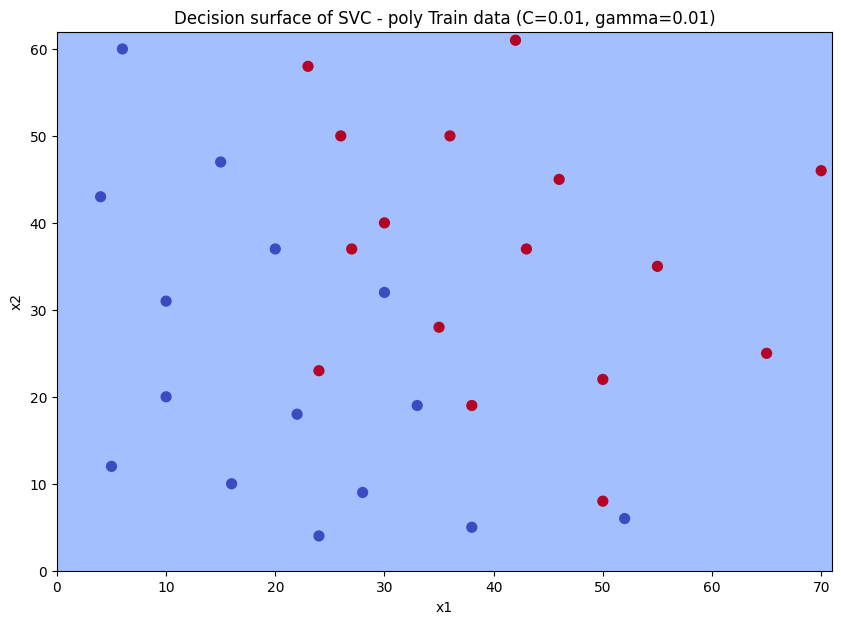

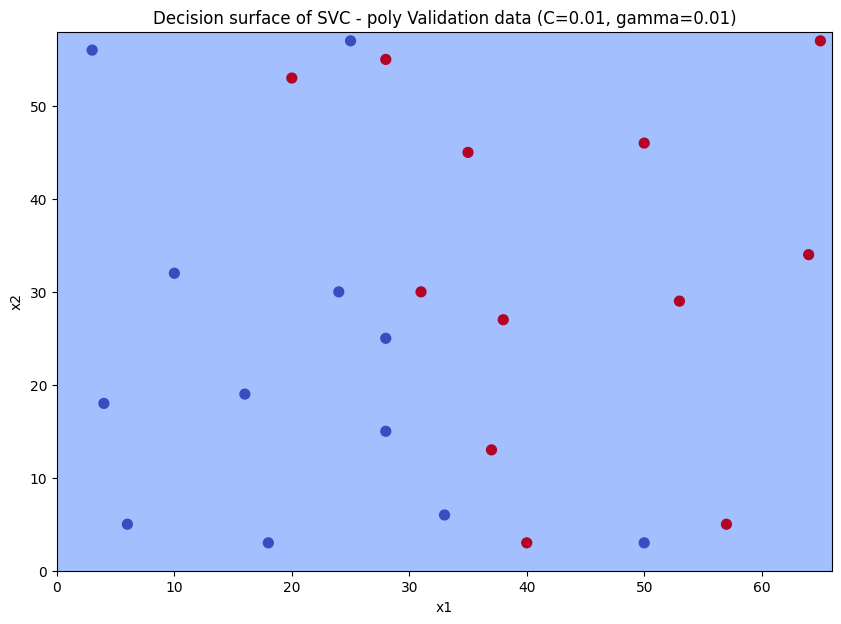

% of correct predictions with training data (C=0.01, gamma=0.1): 51.61290322580645%
% of correct predictions with validation data (C=0.01, gamma=0.1): 50.0%


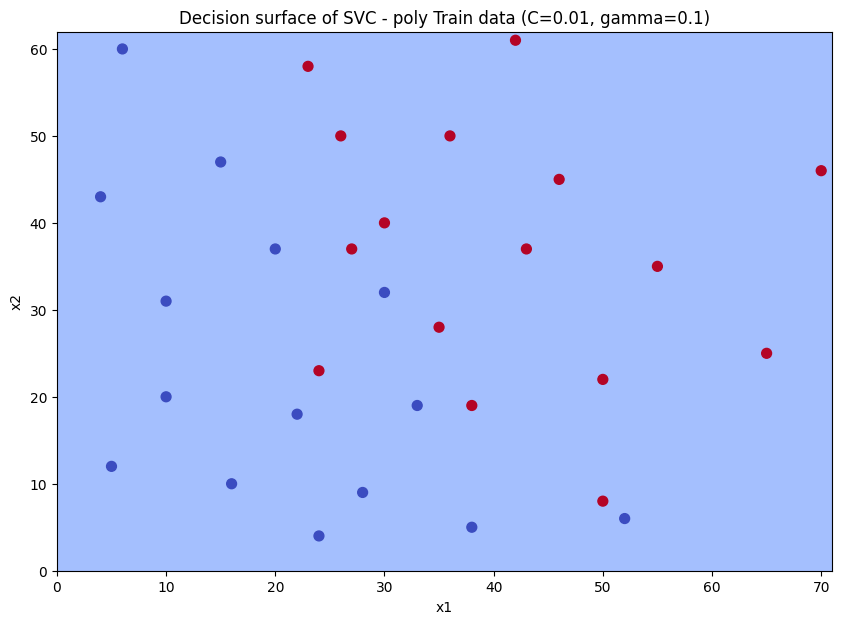

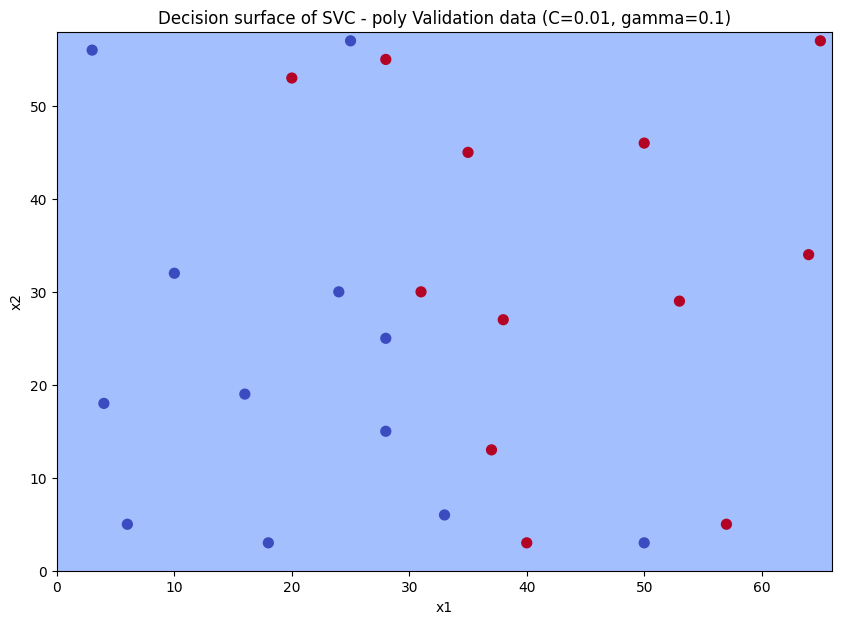

% of correct predictions with training data (C=0.01, gamma=0.5): 51.61290322580645%
% of correct predictions with validation data (C=0.01, gamma=0.5): 50.0%


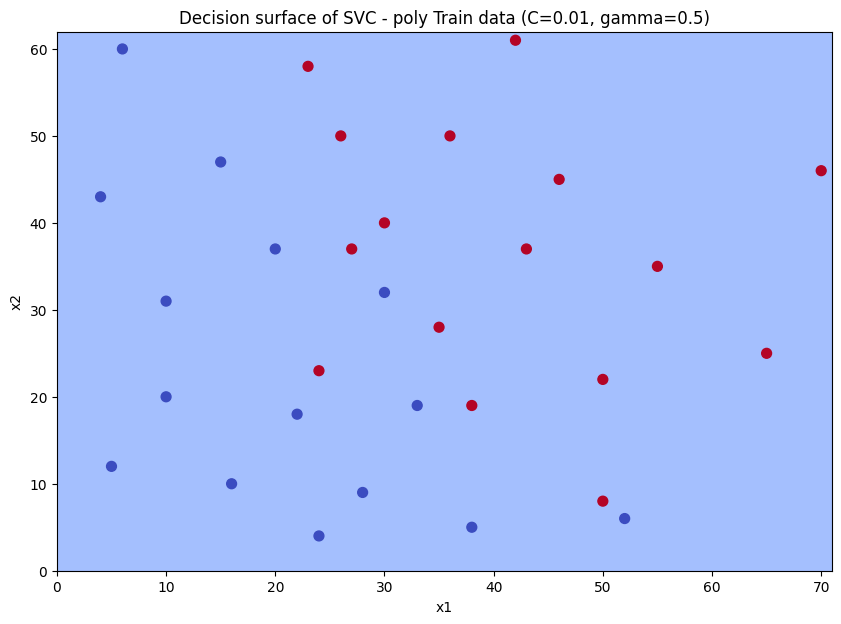

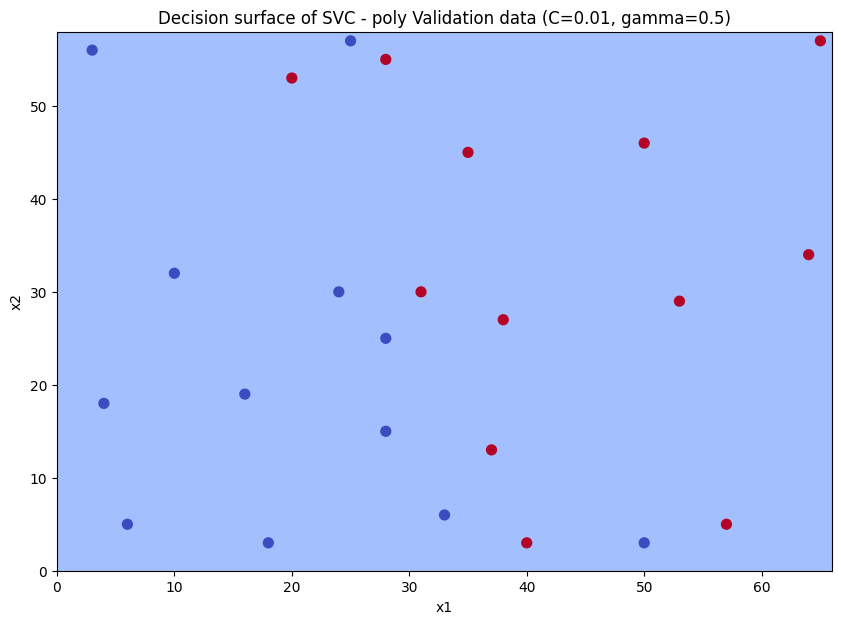

% of correct predictions with training data (C=0.01, gamma=1): 51.61290322580645%
% of correct predictions with validation data (C=0.01, gamma=1): 50.0%


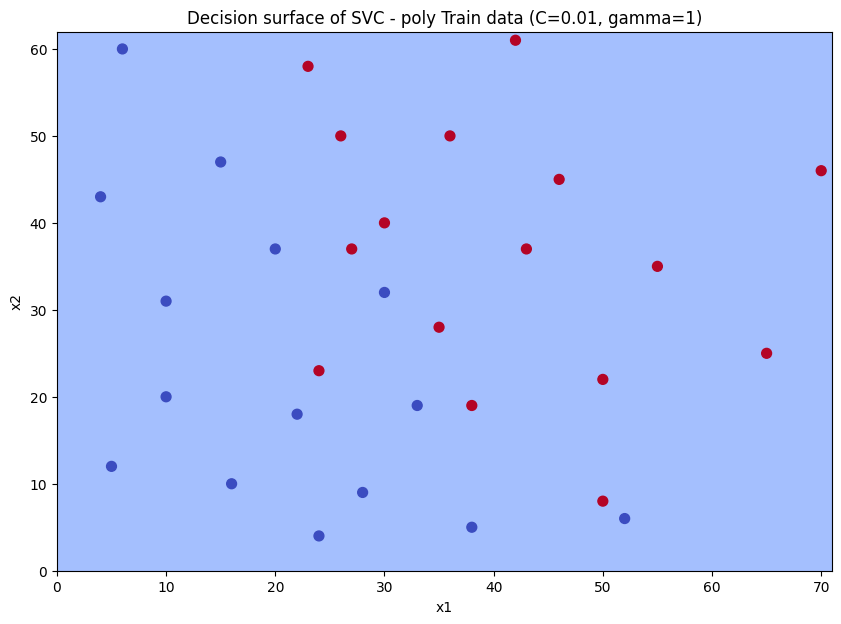

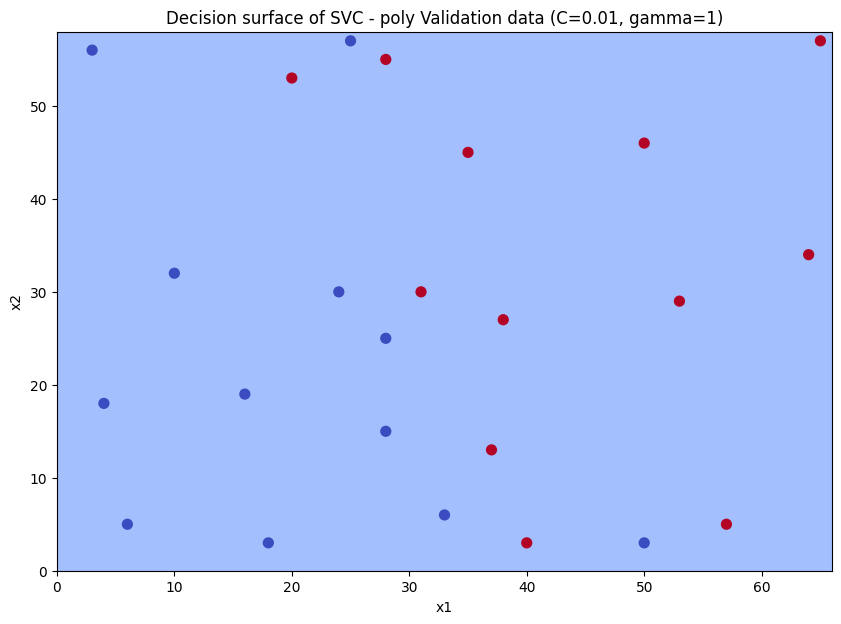

% of correct predictions with training data (C=0.01, gamma=10): 51.61290322580645%
% of correct predictions with validation data (C=0.01, gamma=10): 50.0%


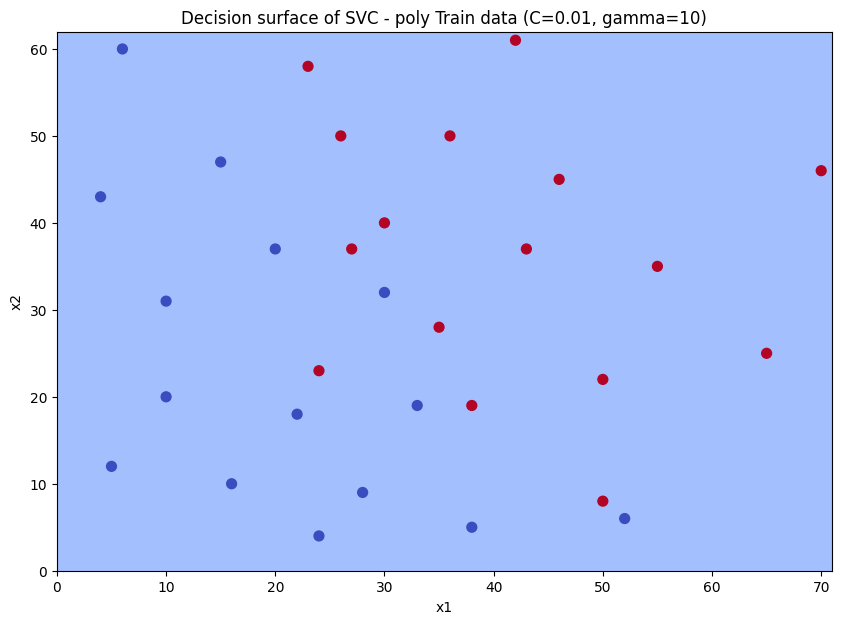

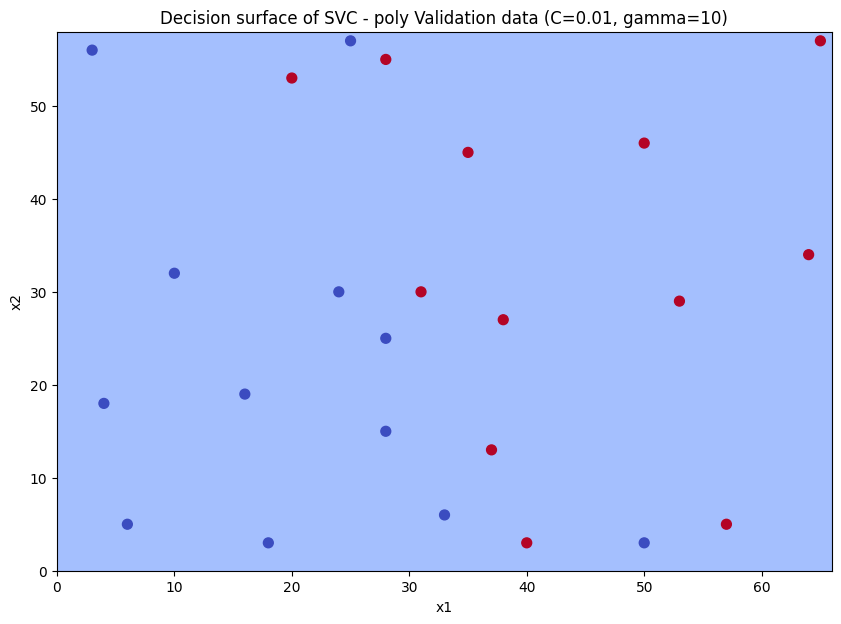

% of correct predictions with training data (C=1, gamma=1e-05): 51.61290322580645%
% of correct predictions with validation data (C=1, gamma=1e-05): 50.0%


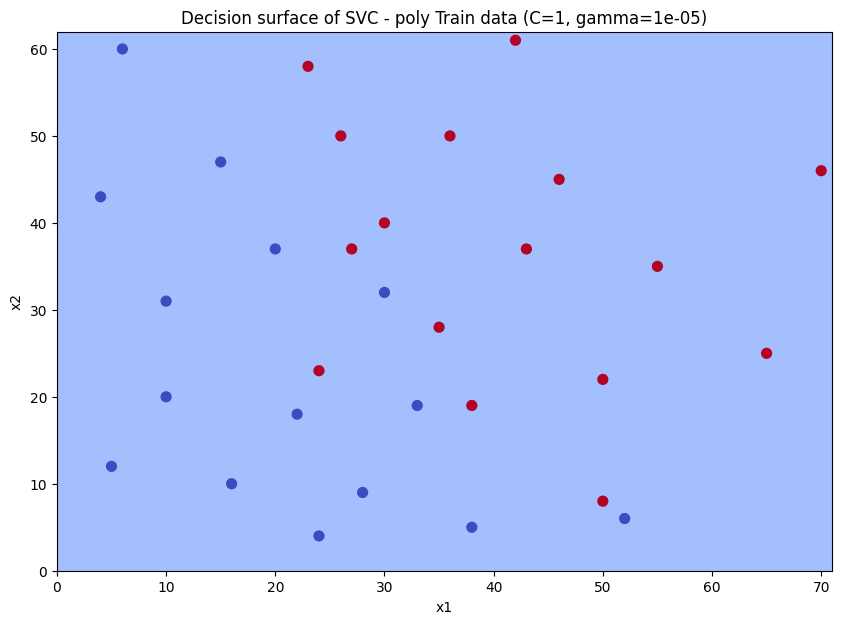

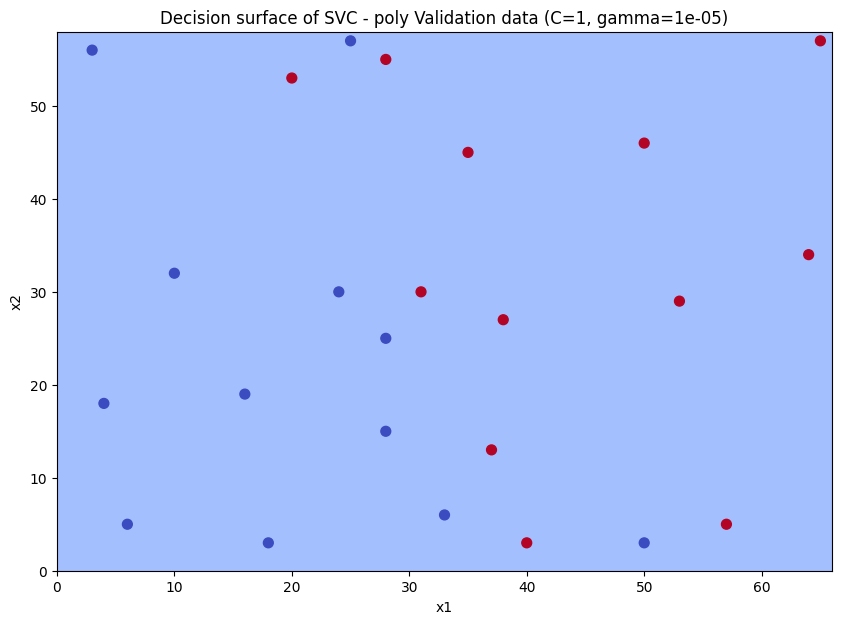

% of correct predictions with training data (C=1, gamma=0.01): 90.32258064516128%
% of correct predictions with validation data (C=1, gamma=0.01): 75.0%


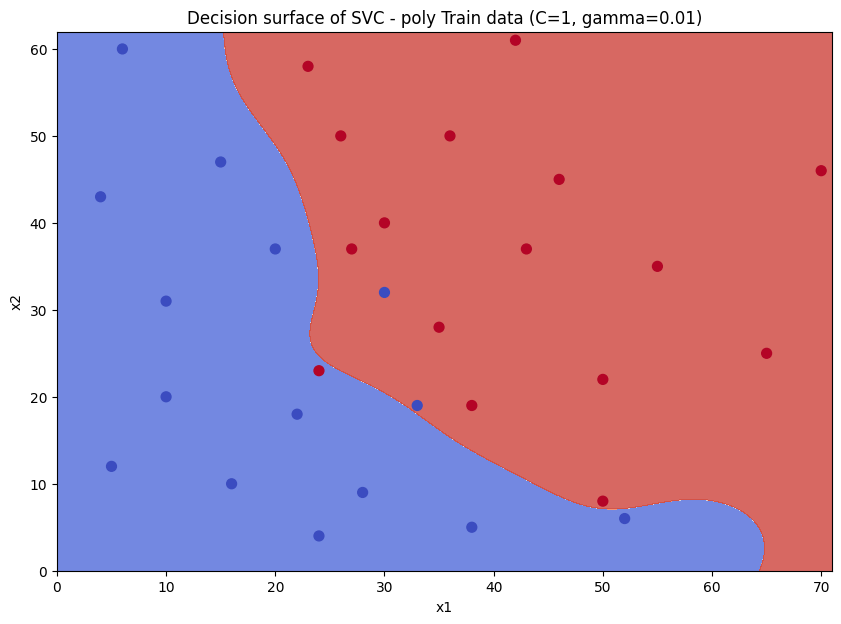

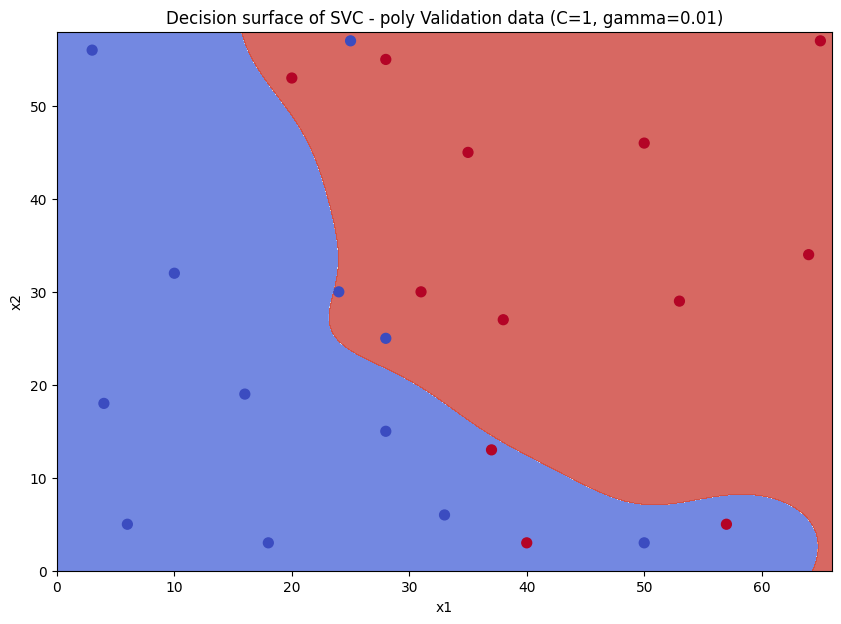

% of correct predictions with training data (C=1, gamma=0.1): 100.0%
% of correct predictions with validation data (C=1, gamma=0.1): 54.16666666666667%


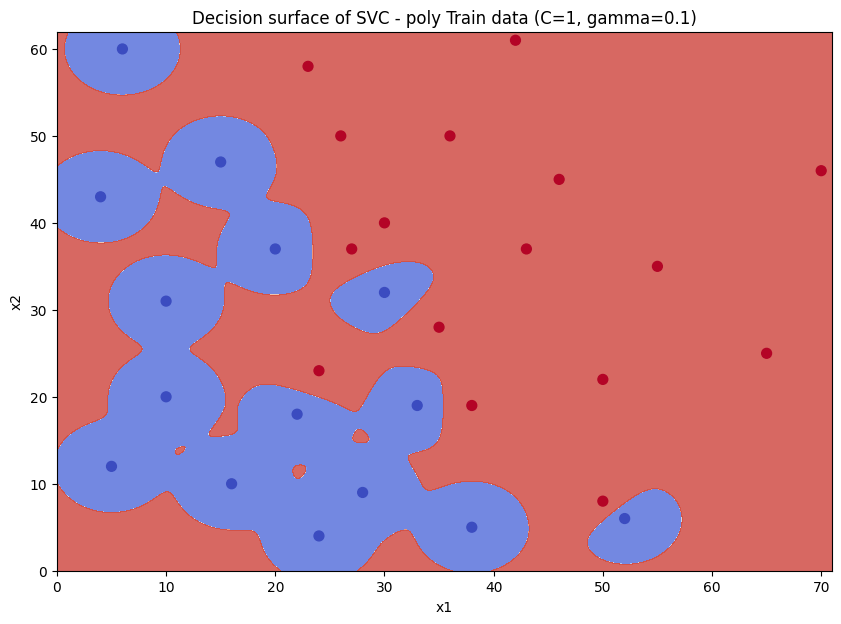

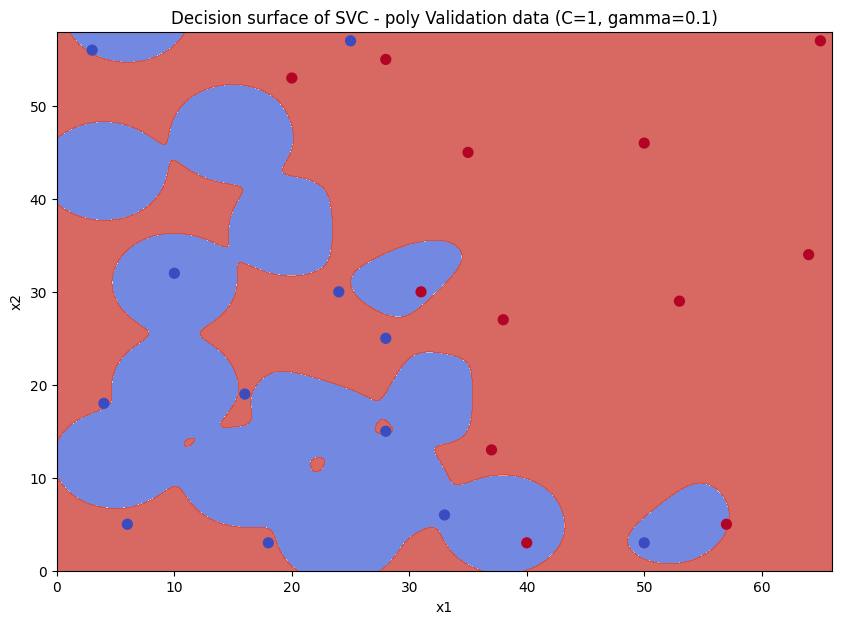

% of correct predictions with training data (C=1, gamma=0.5): 100.0%
% of correct predictions with validation data (C=1, gamma=0.5): 50.0%


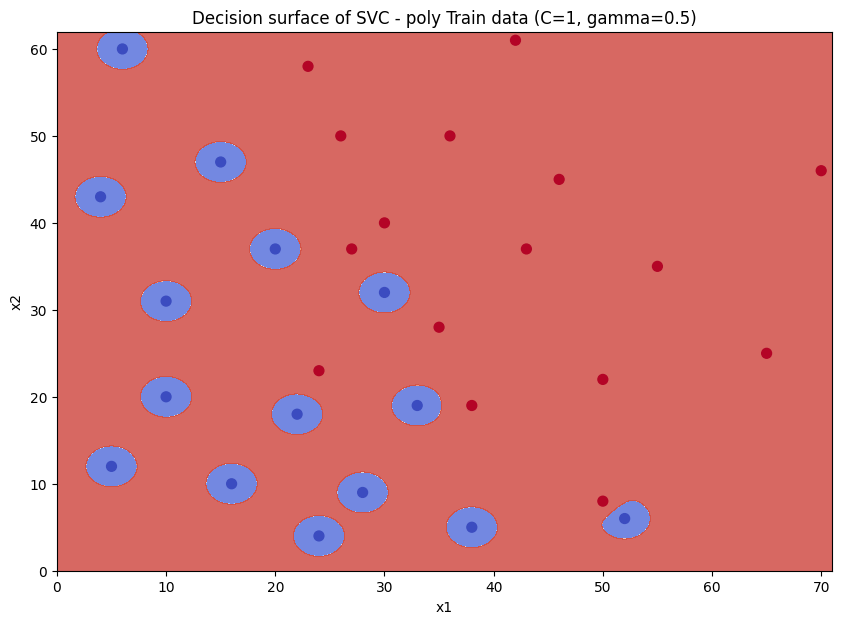

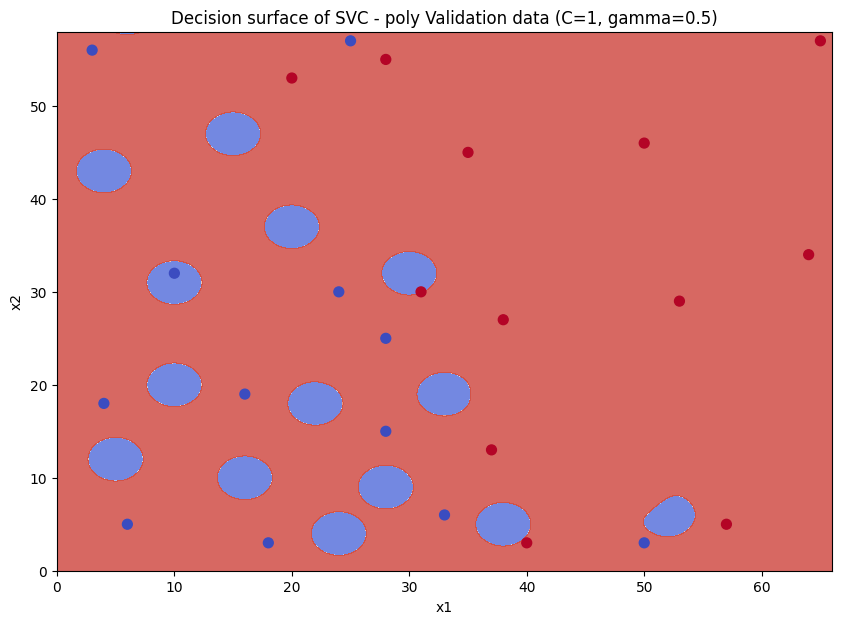

% of correct predictions with training data (C=1, gamma=1): 100.0%
% of correct predictions with validation data (C=1, gamma=1): 54.16666666666667%


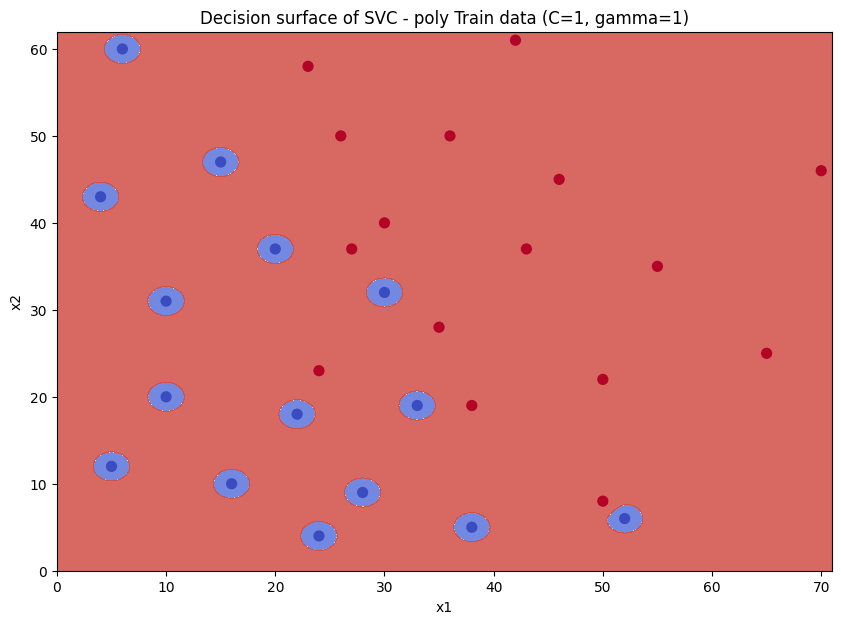

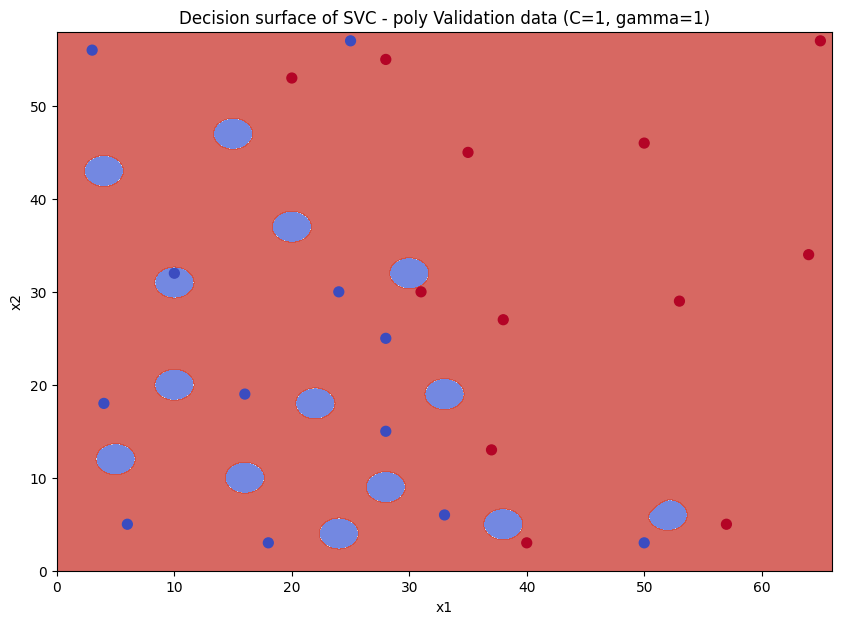

% of correct predictions with training data (C=1, gamma=10): 100.0%
% of correct predictions with validation data (C=1, gamma=10): 50.0%


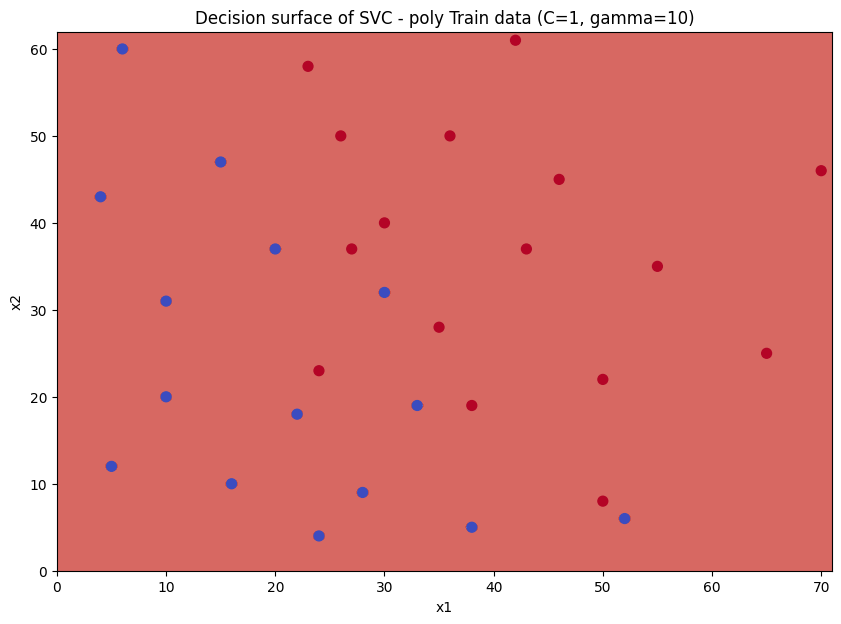

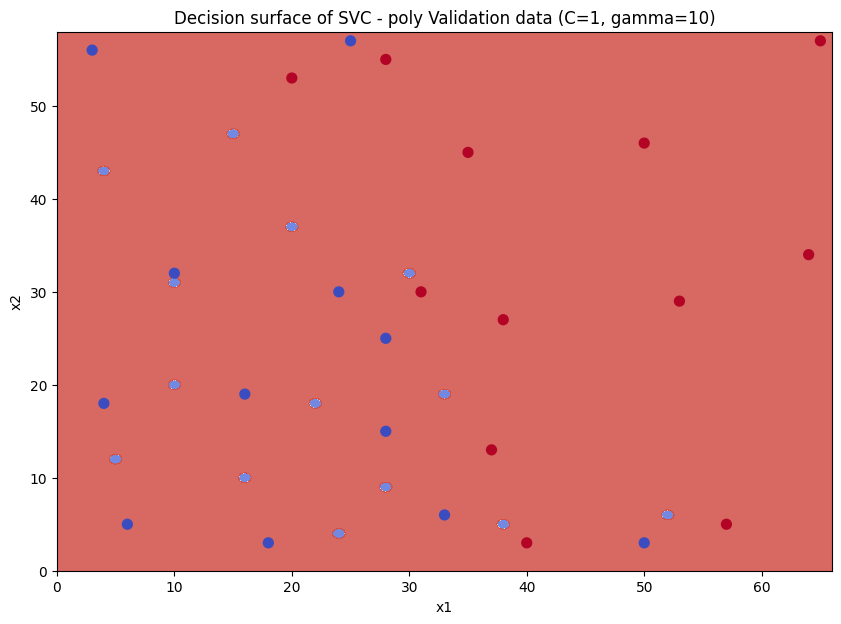

% of correct predictions with training data (C=10, gamma=1e-05): 90.32258064516128%
% of correct predictions with validation data (C=10, gamma=1e-05): 83.33333333333334%


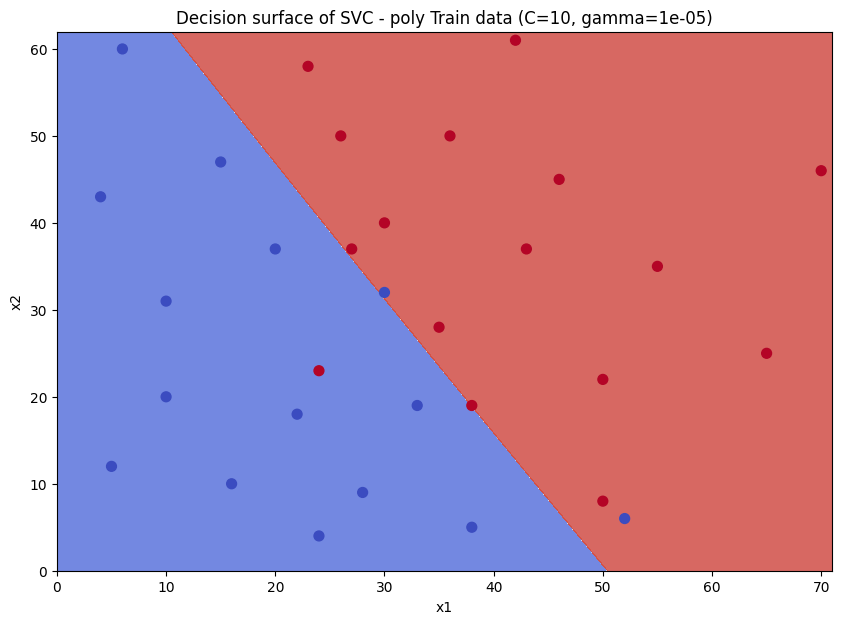

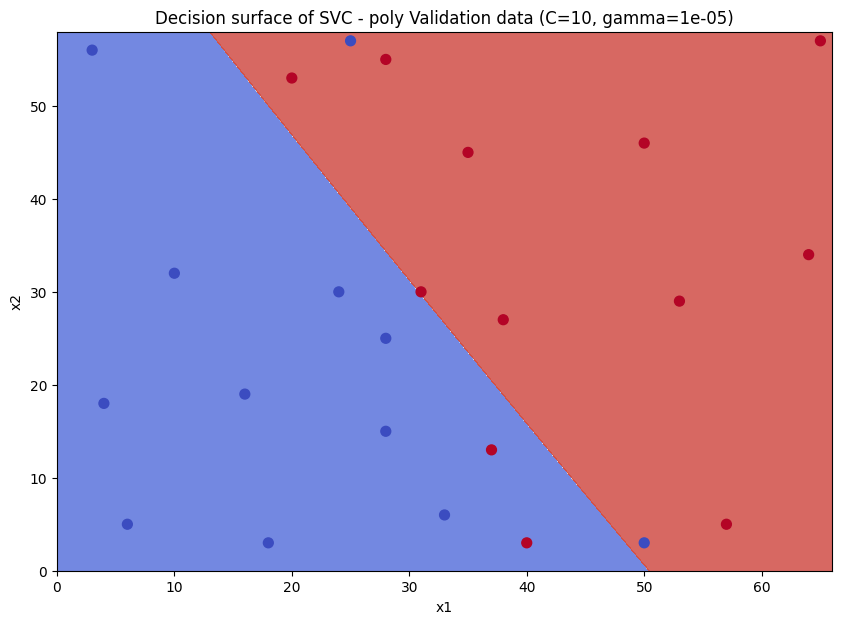

% of correct predictions with training data (C=10, gamma=0.01): 100.0%
% of correct predictions with validation data (C=10, gamma=0.01): 75.0%


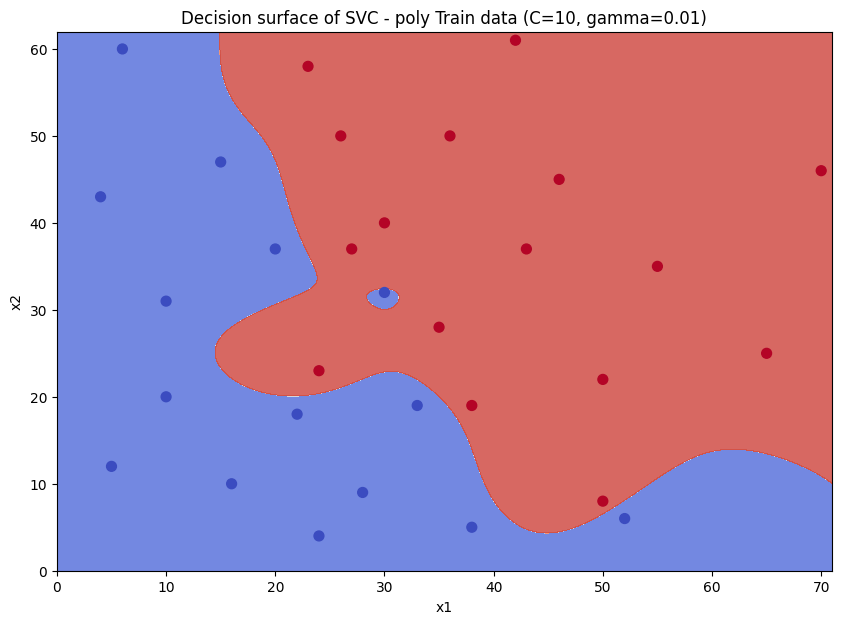

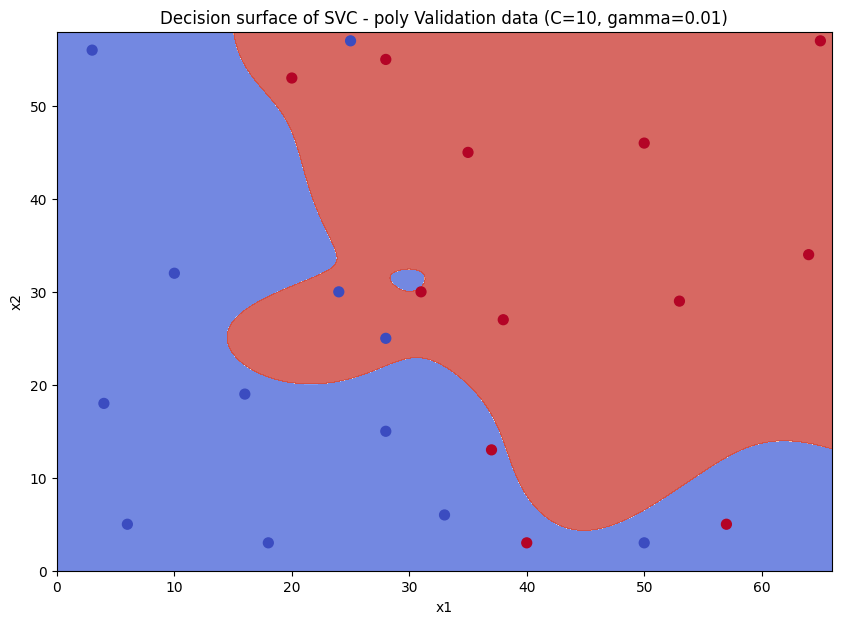

% of correct predictions with training data (C=10, gamma=0.1): 100.0%
% of correct predictions with validation data (C=10, gamma=0.1): 70.83333333333334%


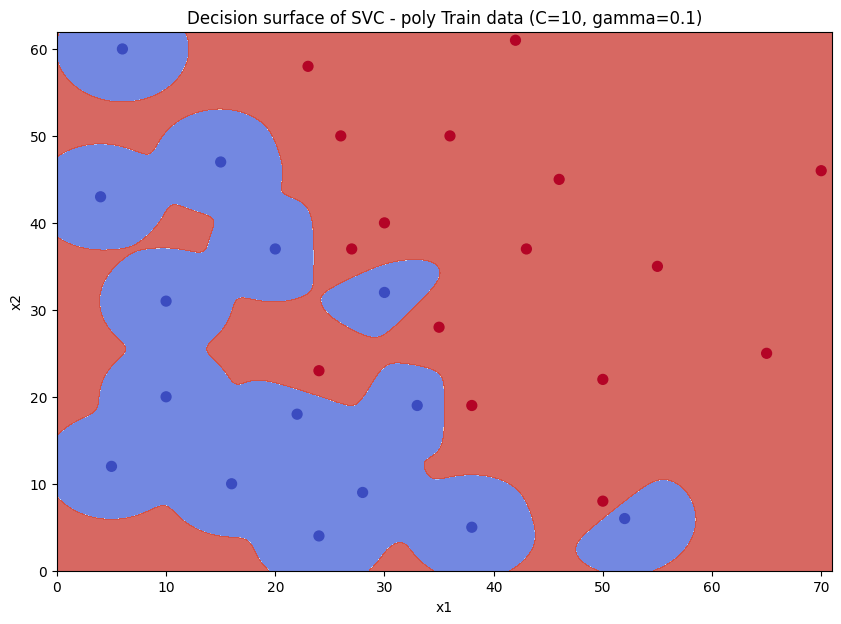

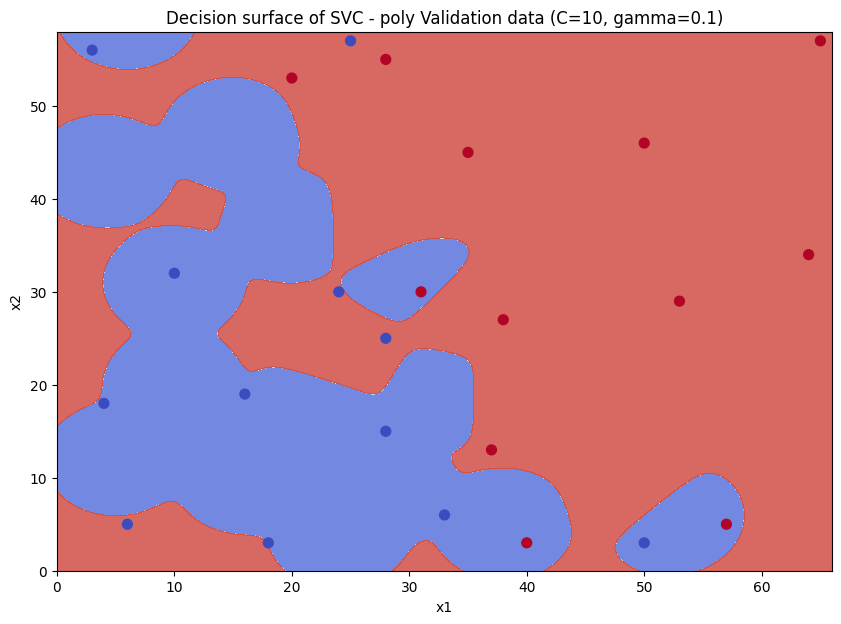

% of correct predictions with training data (C=10, gamma=0.5): 100.0%
% of correct predictions with validation data (C=10, gamma=0.5): 50.0%


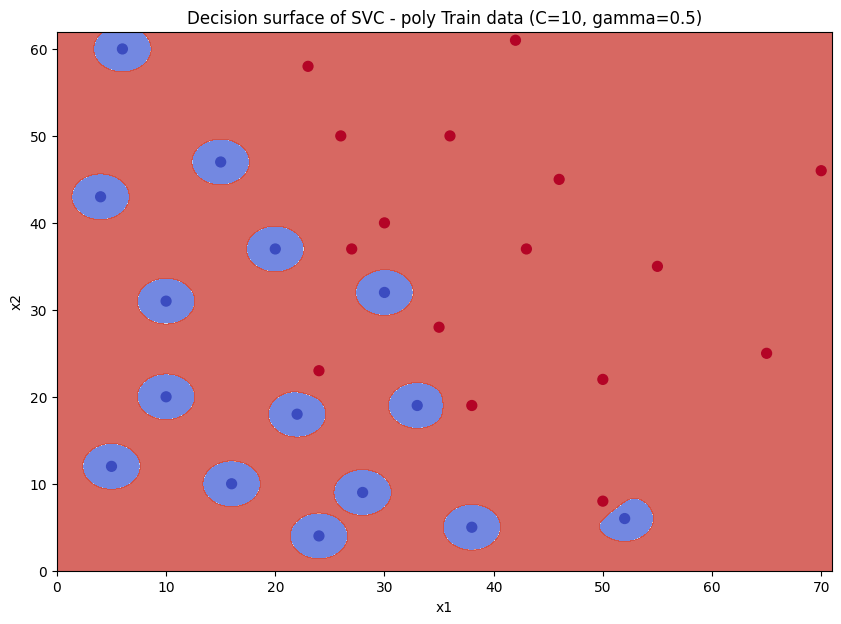

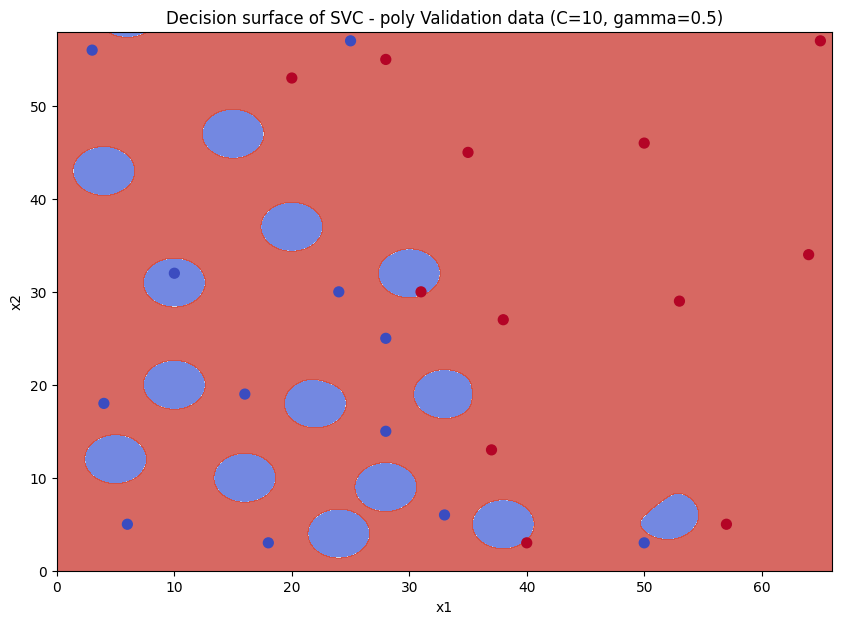

% of correct predictions with training data (C=10, gamma=1): 100.0%
% of correct predictions with validation data (C=10, gamma=1): 54.16666666666667%


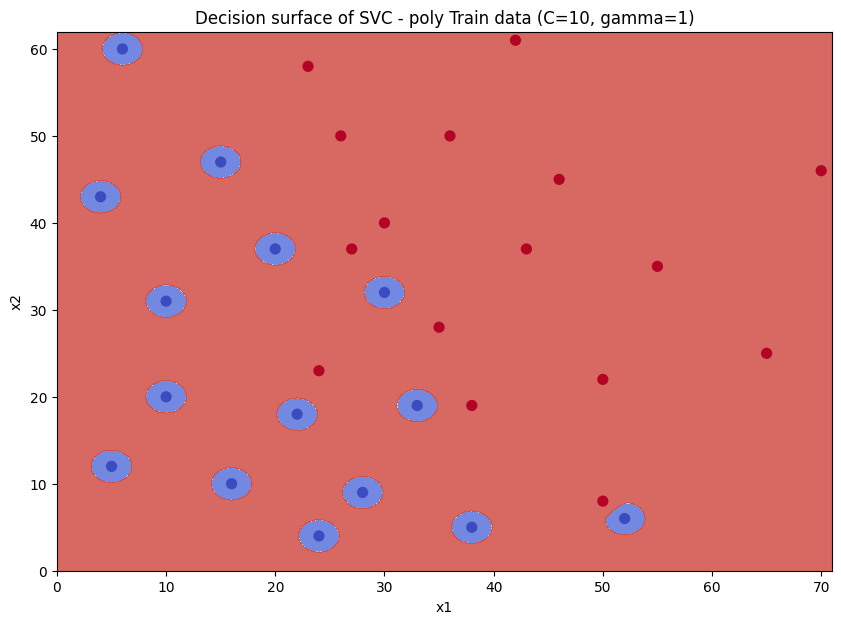

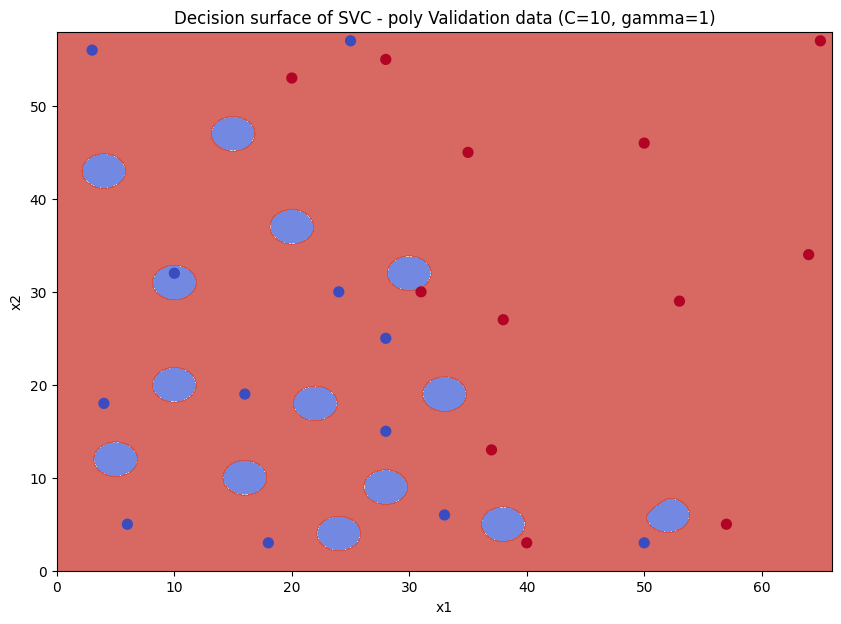

% of correct predictions with training data (C=10, gamma=10): 100.0%
% of correct predictions with validation data (C=10, gamma=10): 50.0%


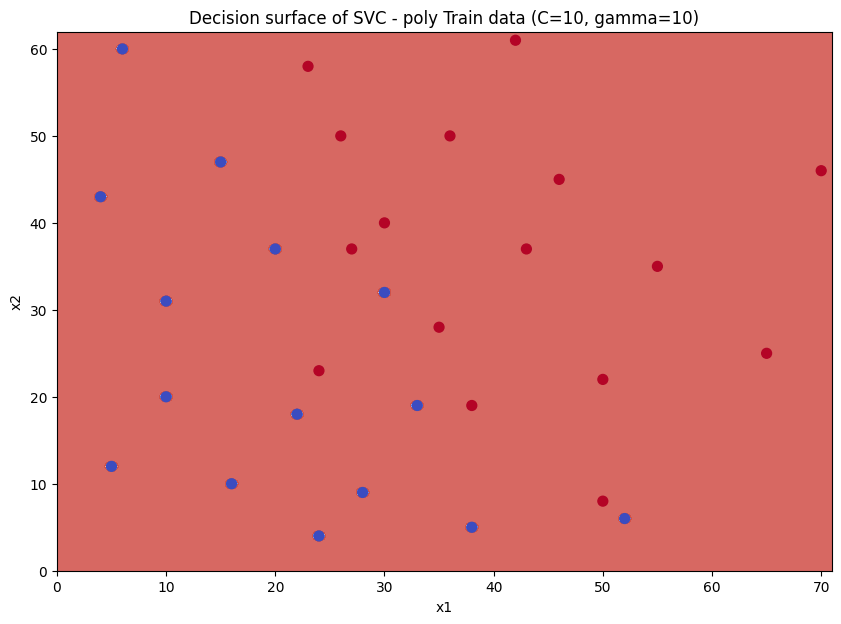

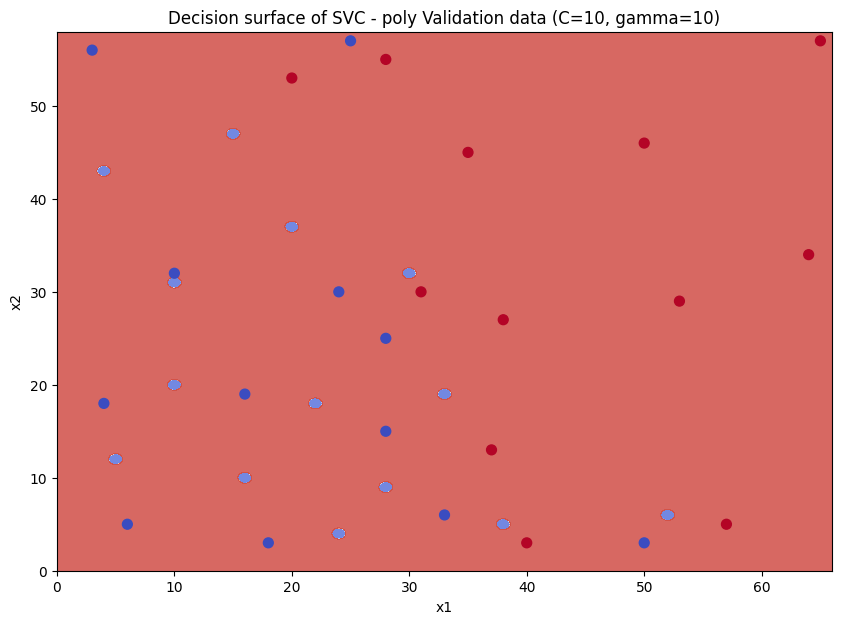

% of correct predictions with training data (C=1000.0, gamma=1e-05): 90.32258064516128%
% of correct predictions with validation data (C=1000.0, gamma=1e-05): 83.33333333333334%


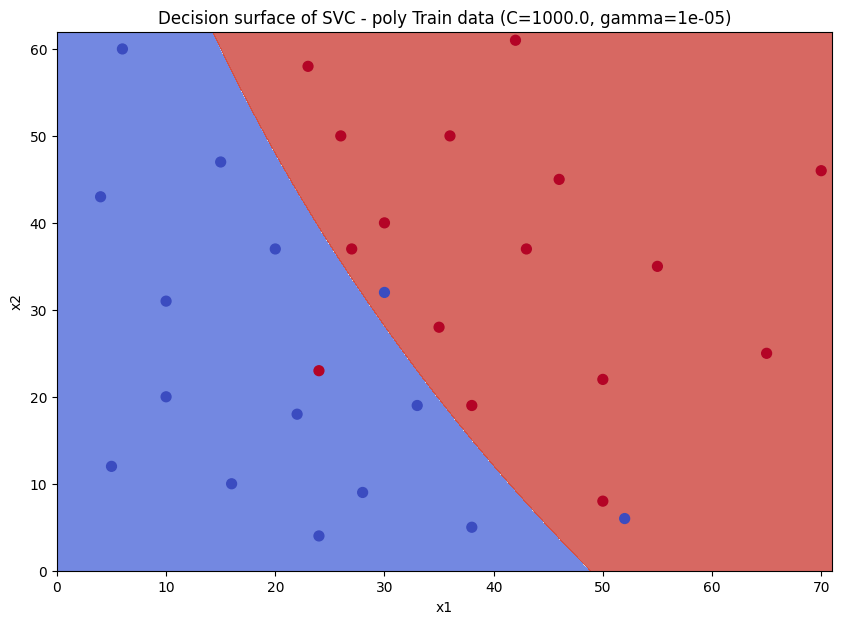

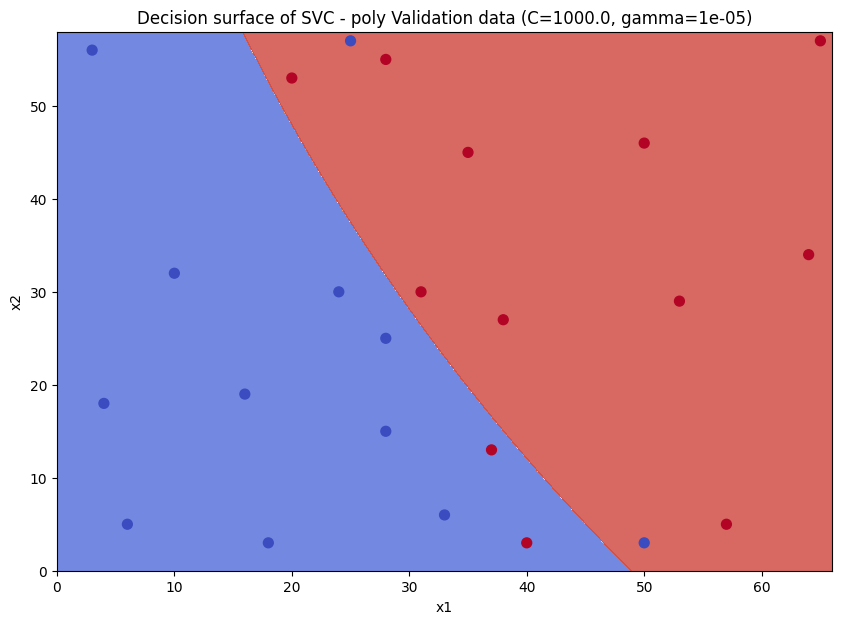

% of correct predictions with training data (C=1000.0, gamma=0.01): 100.0%
% of correct predictions with validation data (C=1000.0, gamma=0.01): 75.0%


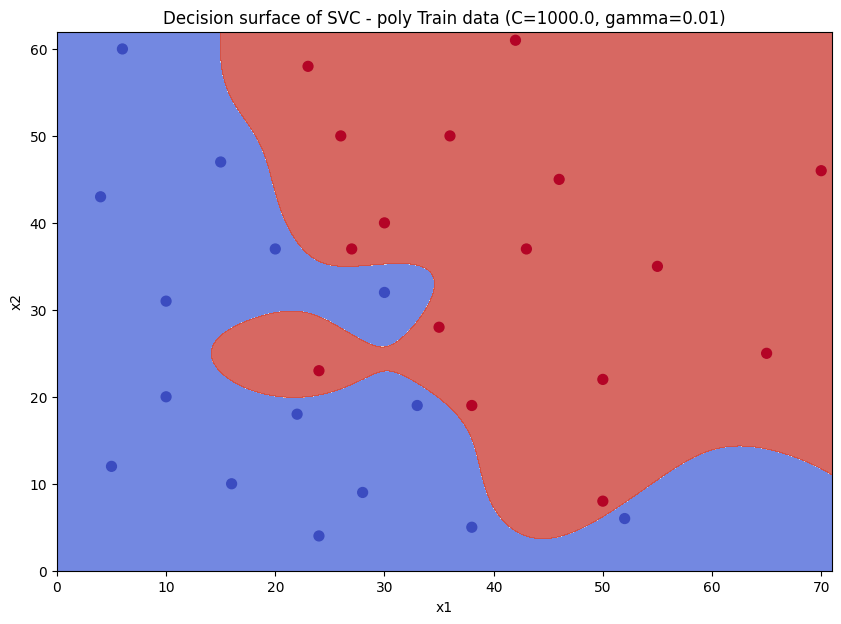

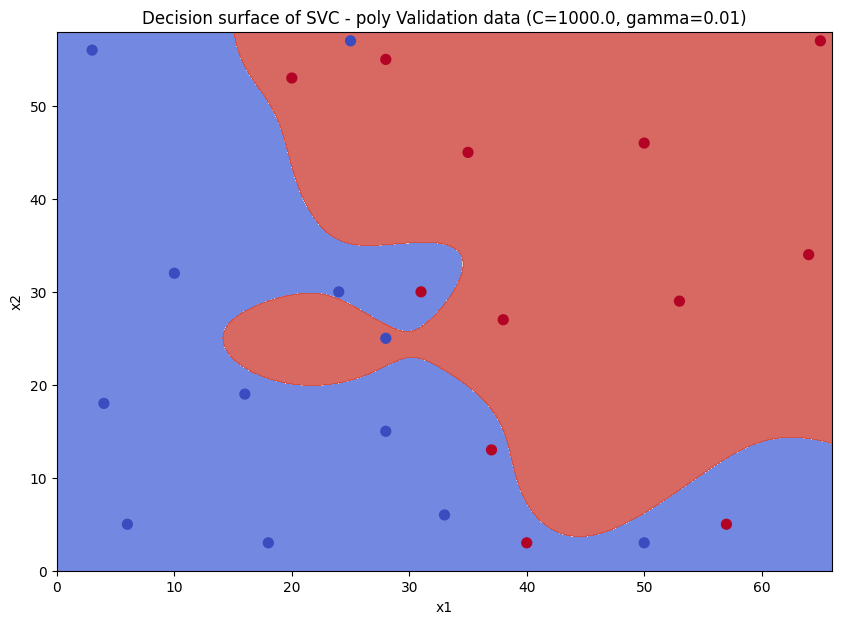

% of correct predictions with training data (C=1000.0, gamma=0.1): 100.0%
% of correct predictions with validation data (C=1000.0, gamma=0.1): 70.83333333333334%


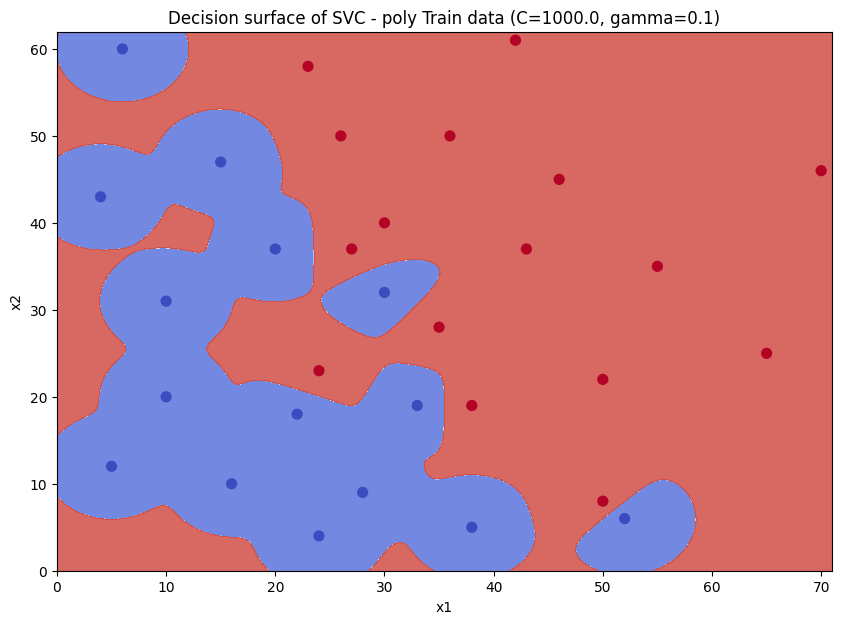

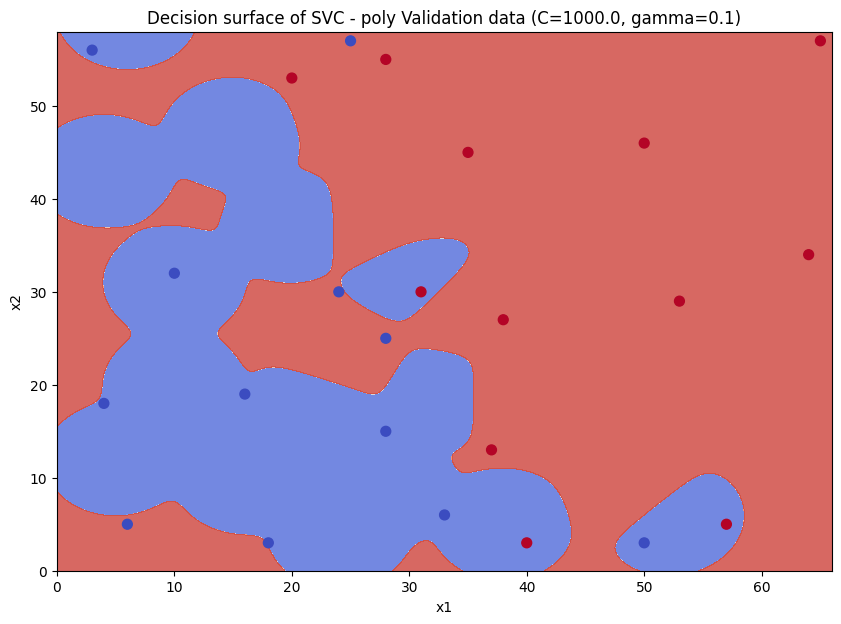

% of correct predictions with training data (C=1000.0, gamma=0.5): 100.0%
% of correct predictions with validation data (C=1000.0, gamma=0.5): 50.0%


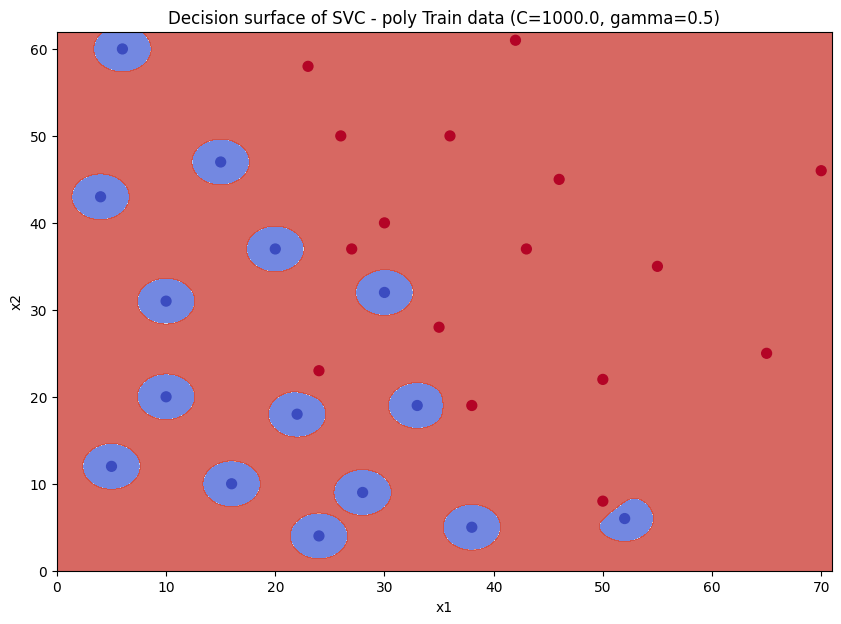

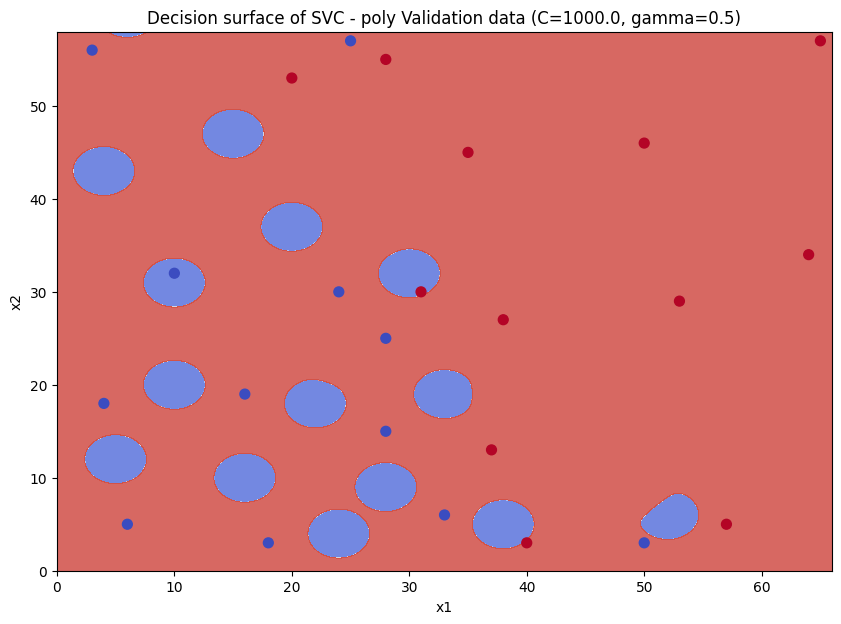

% of correct predictions with training data (C=1000.0, gamma=1): 100.0%
% of correct predictions with validation data (C=1000.0, gamma=1): 54.16666666666667%


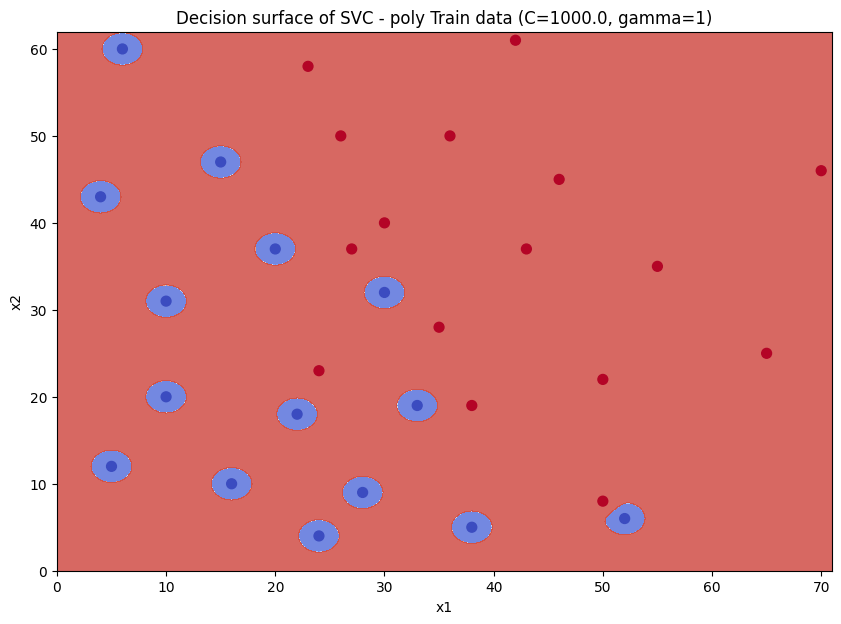

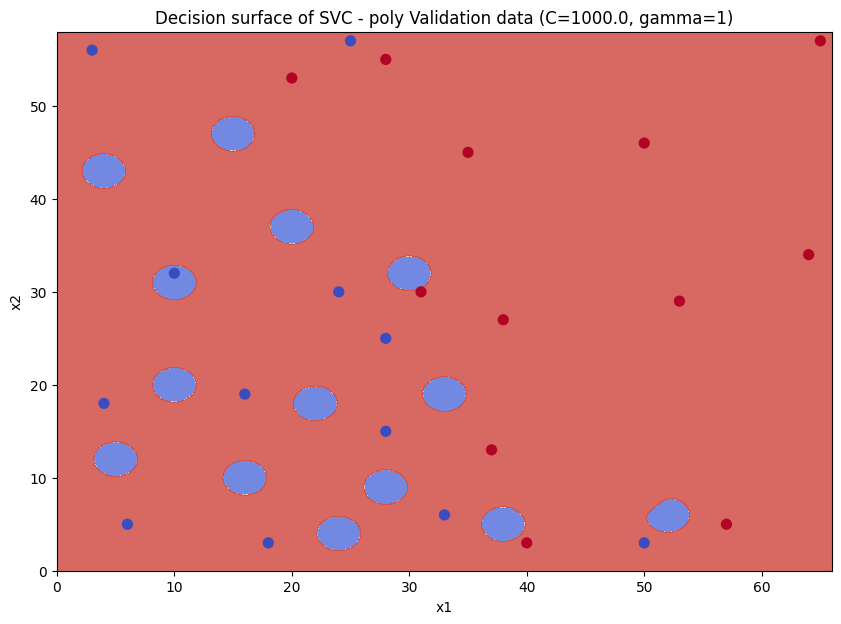

% of correct predictions with training data (C=1000.0, gamma=10): 100.0%
% of correct predictions with validation data (C=1000.0, gamma=10): 50.0%


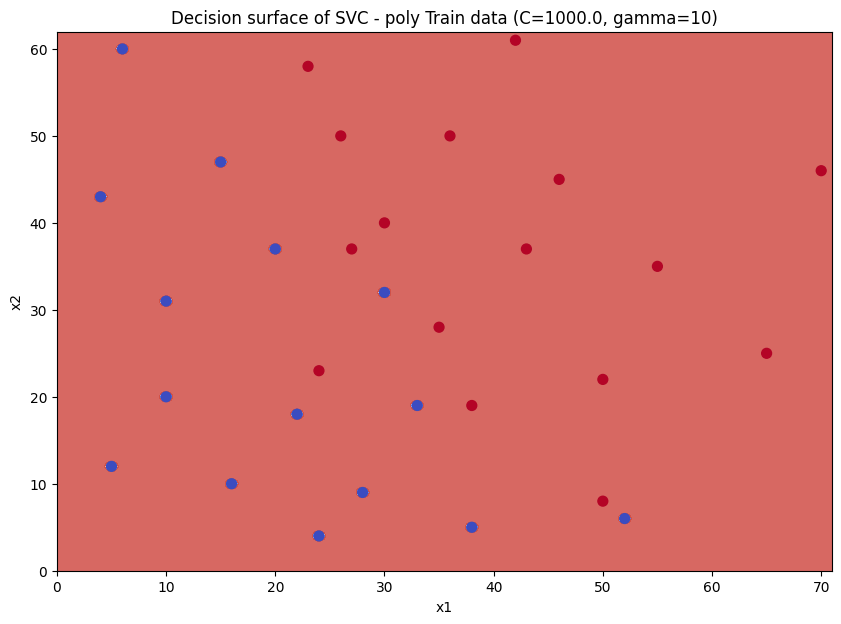

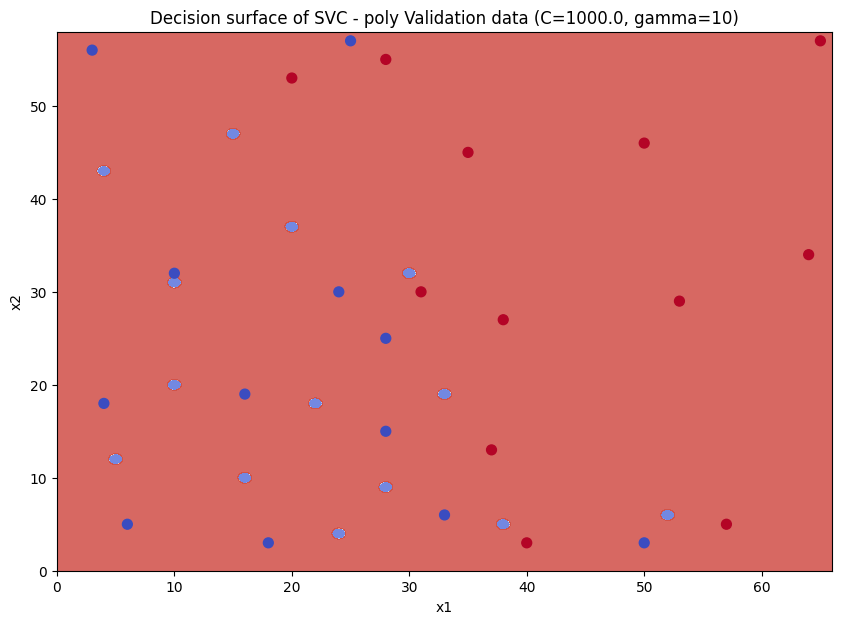

In [ ]:
# TO DO: Define a new model with a 'rbf' kernel and try different values of C and gamma together,
# and calculate the percentage of correct predictions for the training and validation data
Regularization_parameter=[1e-5, 1e-2, 1, 10, 1e3]
gamma_parameter=[1e-5, 1e-2, 0.1, 0.5, 1, 10]


for c in Regularization_parameter:
  for y in gamma_parameter:
    modelrbf2 =SVC(kernel='rbf',C=c, gamma=y) #__________TO DO__________
    clfrbf2  =modelrbf2.fit(XTrain,yTrain)#__________TO DO__________
  # Check predictions for training data
    res = modelrbf2.predict(XTrain)#__________TO DO__________
  # Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)

    correct_predictions_training=100/len(res)*(res==yTrain).sum()
    print(f"% of correct predictions with training data (C={c}, gamma={y}): {correct_predictions_training}%")
    res_val1 = modelrbf2.predict(XVal)
    correct_predictions_validation= 100/len(res_val1)*(res_val1==yVal).sum()
    print(f"% of correct predictions with validation data (C={c}, gamma={y}): {correct_predictions_validation}%")

#__________TO DO________
    plot_figure(XTrain, yTrain, clfrbf2,  f'- poly Train data (C={c}, gamma={y})')


#__________TO DO________
    plot_figure(XVal, yVal, clfrbf2, f'- poly Validation data (C={c}, gamma={y})')